## ISI Epilepsy Exploratory Data Analysis (EDA) with H2o AutoML 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of pathology 

3/8/2022

---

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [4]:
# Plotting setup

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160

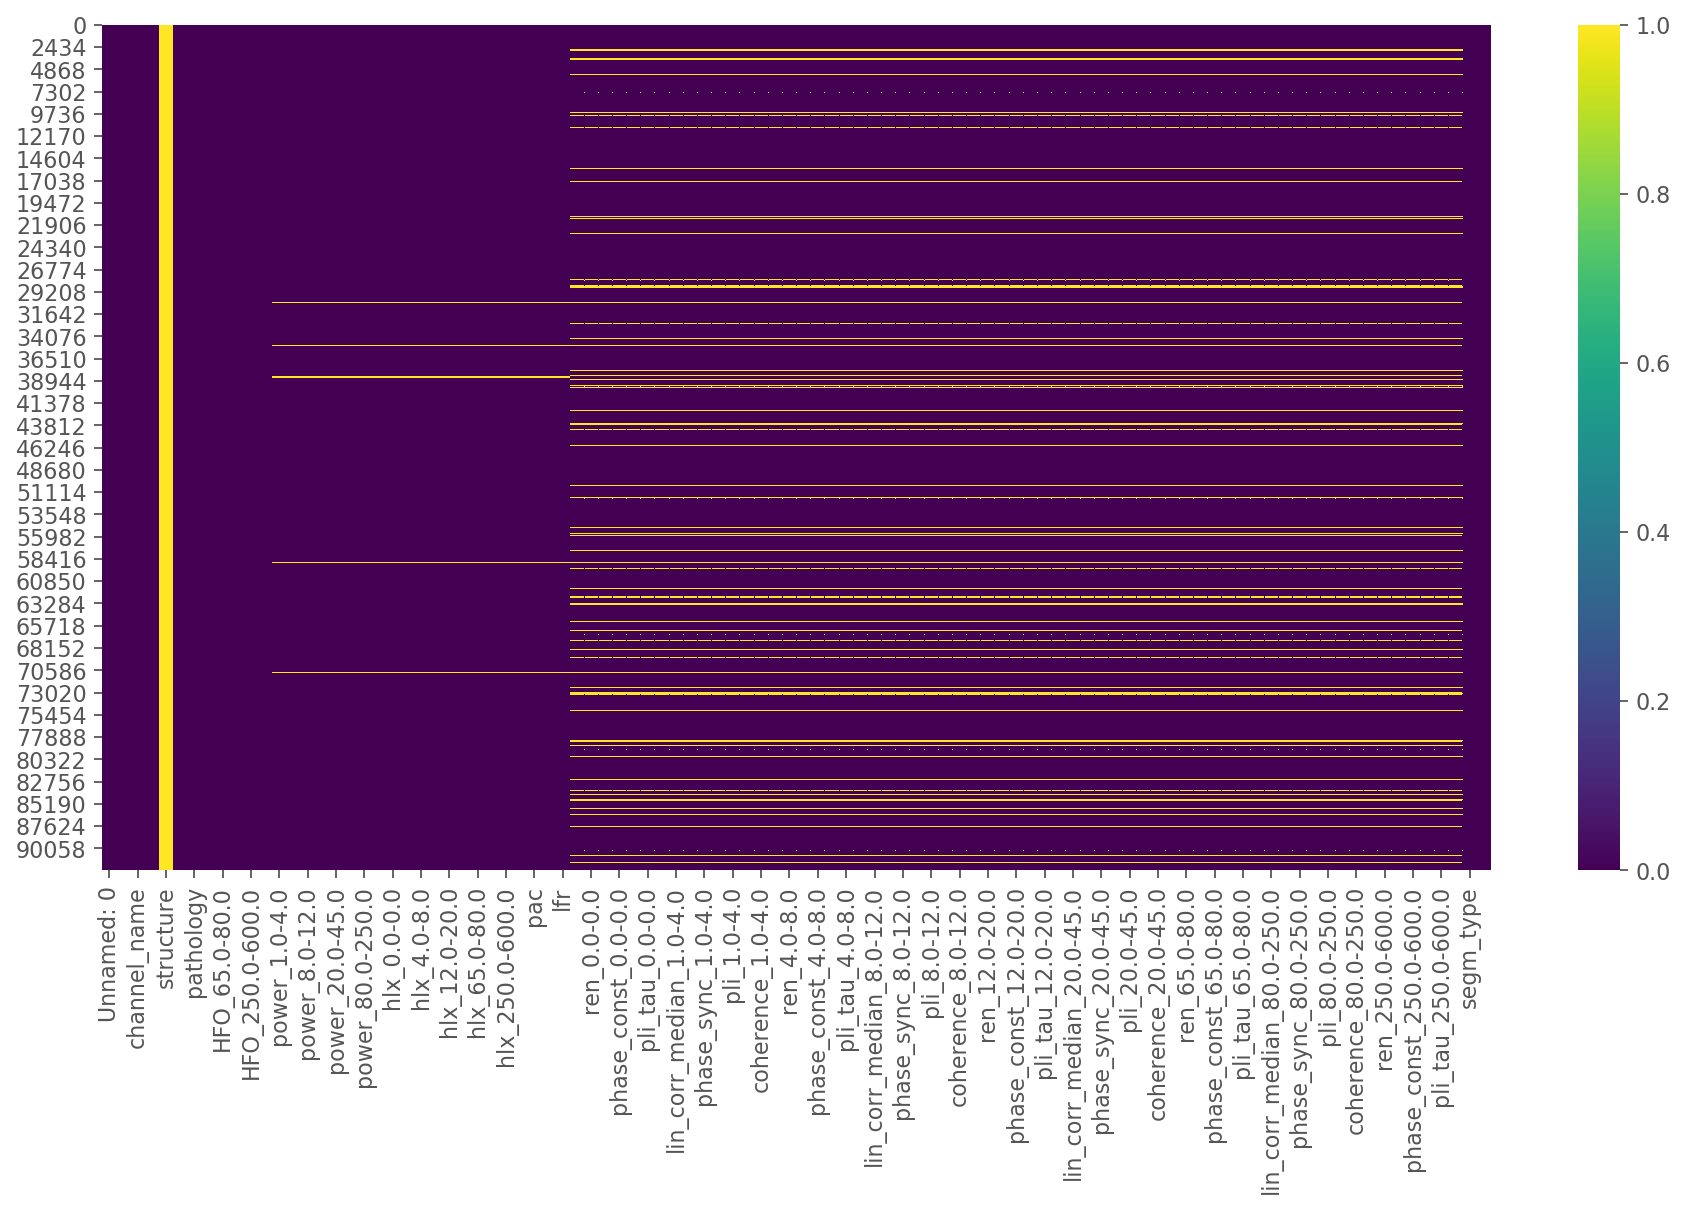

In [5]:
# Show null columns

sns.heatmap(epilepsy.isnull(), cmap = 'viridis', cbar = True);

#pd.options.display.min_rows = 30
#epilepsy.isnull().sum()

In [6]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,34,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,40,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,35,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,37,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,58,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [7]:
# Remove unnecessary columns

epilepsy = epilepsy.drop(['structure'], axis=1)
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [8]:
# Basic statistics

epilepsy.describe()

,patient_id,resected,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
count,92464.000000,92464.000000,92464.000000,92464.0,92464.000000,92464.000000,92464.000000,9.185100e+04,9.185100e+04,9.185100e+04,...,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,92464.000000,92464.000000
mean,537.303340,0.121647,23.258695,0.0,18.444627,32.607555,19.159565,3.177411e-01,2.887090e-01,2.387289e-01,...,0.921873,0.710600,0.030662,0.663745,0.041663,0.035568,-0.002958,0.899877,6.250000,0.562500
std,530.808972,0.326880,11.931679,0.0,18.584647,39.284876,37.979718,5.231405e-01,5.700138e-01,4.831948e-01,...,0.079289,0.308275,0.036740,0.324243,0.199820,0.171318,0.031019,0.097597,4.548376,0.788099
min,59.000000,0.000000,11.000000,0.0,0.000000,0.000000,0.000000,2.364873e-09,5.991072e-10,1.304421e-10,...,0.413911,-0.628716,0.000013,0.044833,0.000000,0.000000,-0.706667,0.645227,0.000000,0.000000
25%,74.000000,0.000000,11.000000,0.0,5.000000,5.000000,1.000000,4.768943e-06,1.300755e-06,4.188223e-07,...,0.843208,0.372571,0.005341,0.301537,0.000000,0.000000,0.000000,0.787374,1.750000,0.000000
50%,92.000000,0.000000,22.000000,0.0,13.000000,17.000000,6.000000,1.325354e-01,6.279375e-02,2.494825e-02,...,0.962194,0.920298,0.022501,0.856442,0.000000,0.000000,0.000000,0.956153,8.000000,0.000000
75%,1021.000000,0.000000,31.000000,0.0,26.000000,45.000000,20.000000,4.901011e-01,3.697457e-01,2.872959e-01,...,0.997170,0.988867,0.047192,0.967804,0.000000,0.000000,0.000000,0.993218,10.250000,1.000000
max,1718.000000,1.000000,42.000000,0.0,157.000000,335.000000,904.000000,1.649692e+01,1.779064e+01,1.057295e+01,...,1.000000,0.999997,1.034580,0.999998,1.000000,0.999540,0.356667,0.999999,12.000000,2.000000


In [9]:
# Correlatin matrix + rounding

corrmat = epilepsy.corr()
#pd.options.display.float_format = '{:.3f}'.format
corrmat.round(3)

,patient_id,resected,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
patient_id,1.000,0.166,-0.043,NaN,-0.020,0.184,-0.056,0.510,0.428,0.407,...,0.796,0.798,-0.570,0.823,-0.001,-0.002,0.011,0.821,-0.000,0.000
resected,0.166,1.000,0.016,NaN,0.245,0.133,0.244,0.097,0.041,0.035,...,0.140,0.149,-0.047,0.154,0.047,0.056,-0.082,0.152,-0.000,-0.000
outcome,-0.043,0.016,1.000,NaN,0.016,0.012,-0.025,0.063,-0.010,-0.062,...,0.028,0.016,-0.020,0.012,-0.042,-0.032,-0.030,0.008,0.000,0.000
HFO_65.0-80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HFO_80.0-250.0,-0.020,0.245,0.016,NaN,1.000,0.429,0.653,0.006,-0.046,-0.062,...,-0.024,-0.023,0.256,-0.027,-0.033,-0.035,0.040,-0.032,0.008,0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pli_250.0-600.0,-0.002,0.056,-0.032,NaN,-0.035,0.058,0.028,0.065,0.112,0.151,...,0.185,0.183,-0.139,0.193,0.996,1.000,-0.502,0.193,-0.005,-0.028
pli_tau_250.0-600.0,0.011,-0.082,-0.030,NaN,0.040,-0.021,-0.009,-0.014,-0.029,-0.083,...,-0.090,-0.087,0.072,-0.095,-0.457,-0.502,1.000,-0.094,-0.012,0.022
coherence_250.0-600.0,0.821,0.152,0.008,NaN,-0.032,0.255,-0.061,0.506,0.452,0.456,...,0.921,0.990,-0.640,0.998,0.192,0.193,-0.094,1.000,0.031,0.011
segm_type,-0.000,-0.000,0.000,NaN,0.008,-0.032,0.005,-0.022,-0.027,-0.039,...,0.008,0.034,0.013,0.028,-0.004,-0.005,-0.012,0.031,1.000,0.065


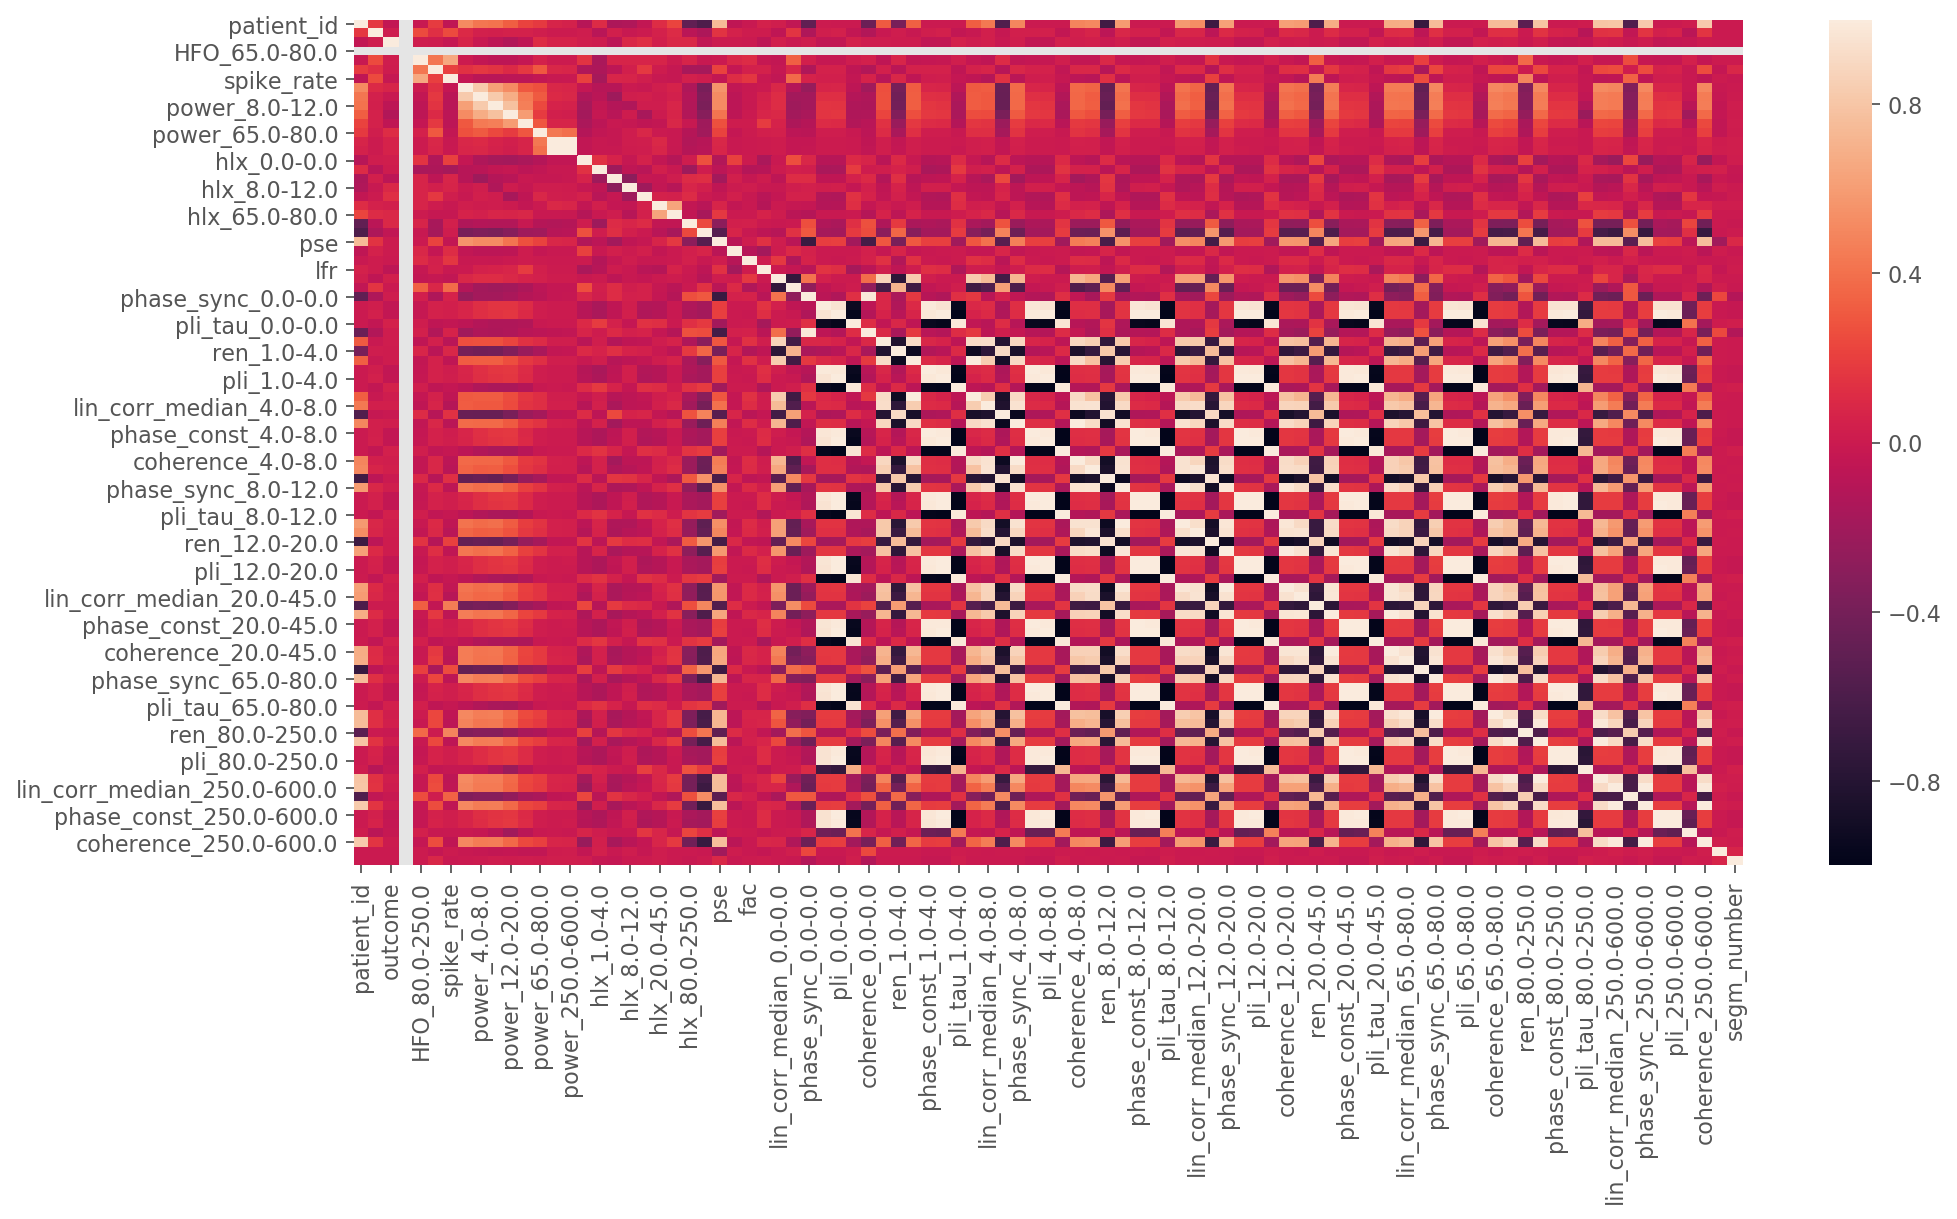

In [10]:
# Correlation matrix heatmap

sns.heatmap(corrmat);

In [11]:
# Columns names

cols = epilepsy.columns
print(list(cols))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'pathology', 'outcome', 'HFO_65.0-80.0', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'phase_const_0.0-0.0', 'pli_0.0-0.0', 'pli_tau_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'phase_const_1.0-4.0', 'pli_1.0-4.0', 'pli_tau_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'phase_const_4.0-8.0', 'pli_4.0-8.0', 'pli_tau_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'phase_const_8.0-12.0', 'pli

In [12]:
# Split epilepsy dataset to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy.groupby(epilepsy['patient_id'] < 100)]

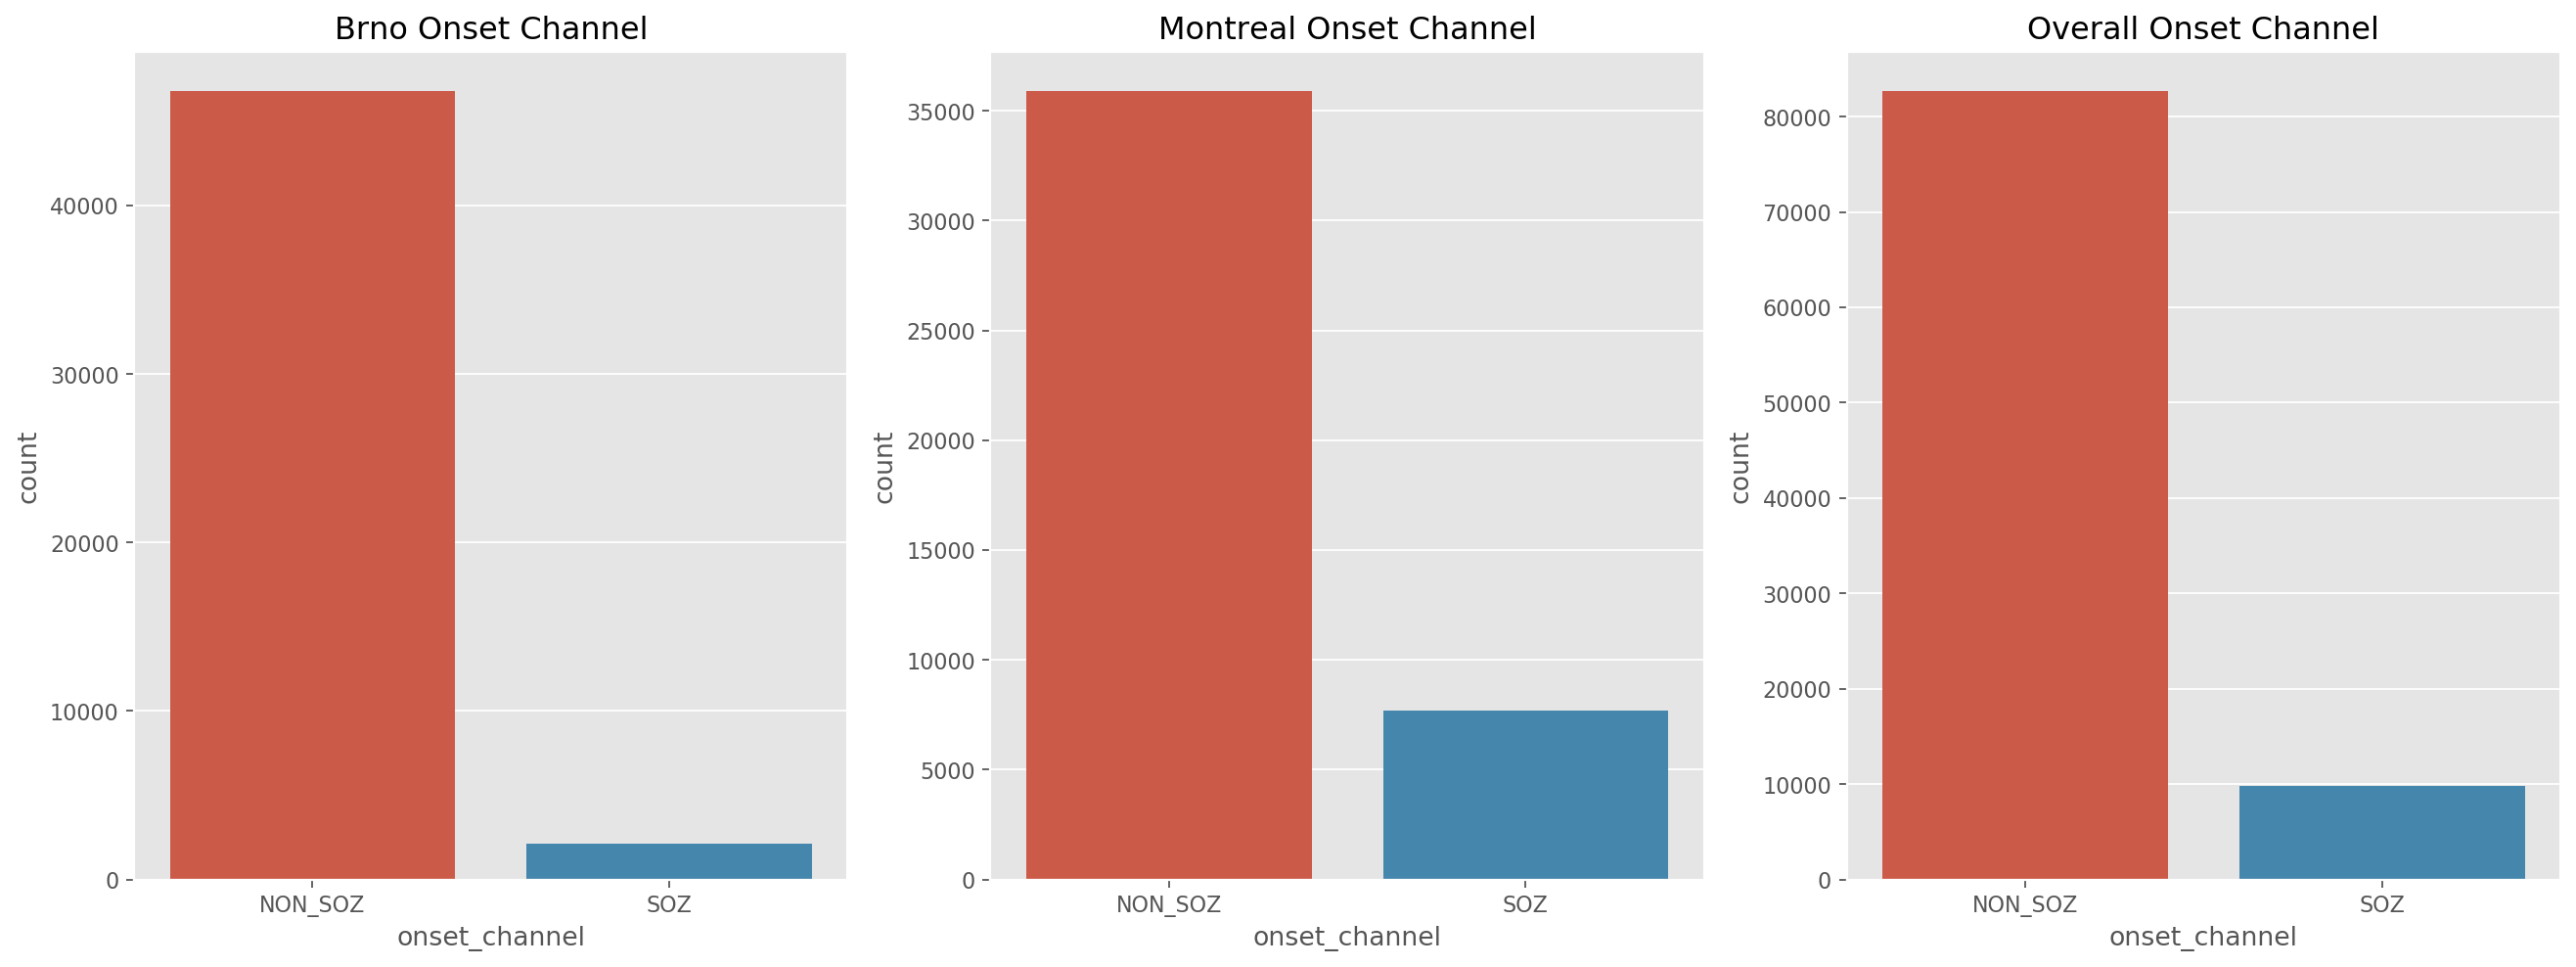

In [13]:
# Onset channels countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('onset_channel', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Onset Channel')

sns.countplot('onset_channel', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Onset Channel')

sns.countplot('onset_channel', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Onset Channel')

#epilepsy['onset_channel'].value_counts()
#epilepsy['onset_channel'].value_counts().plot.pie(autopct = '%1.2f%%');

plt.show()

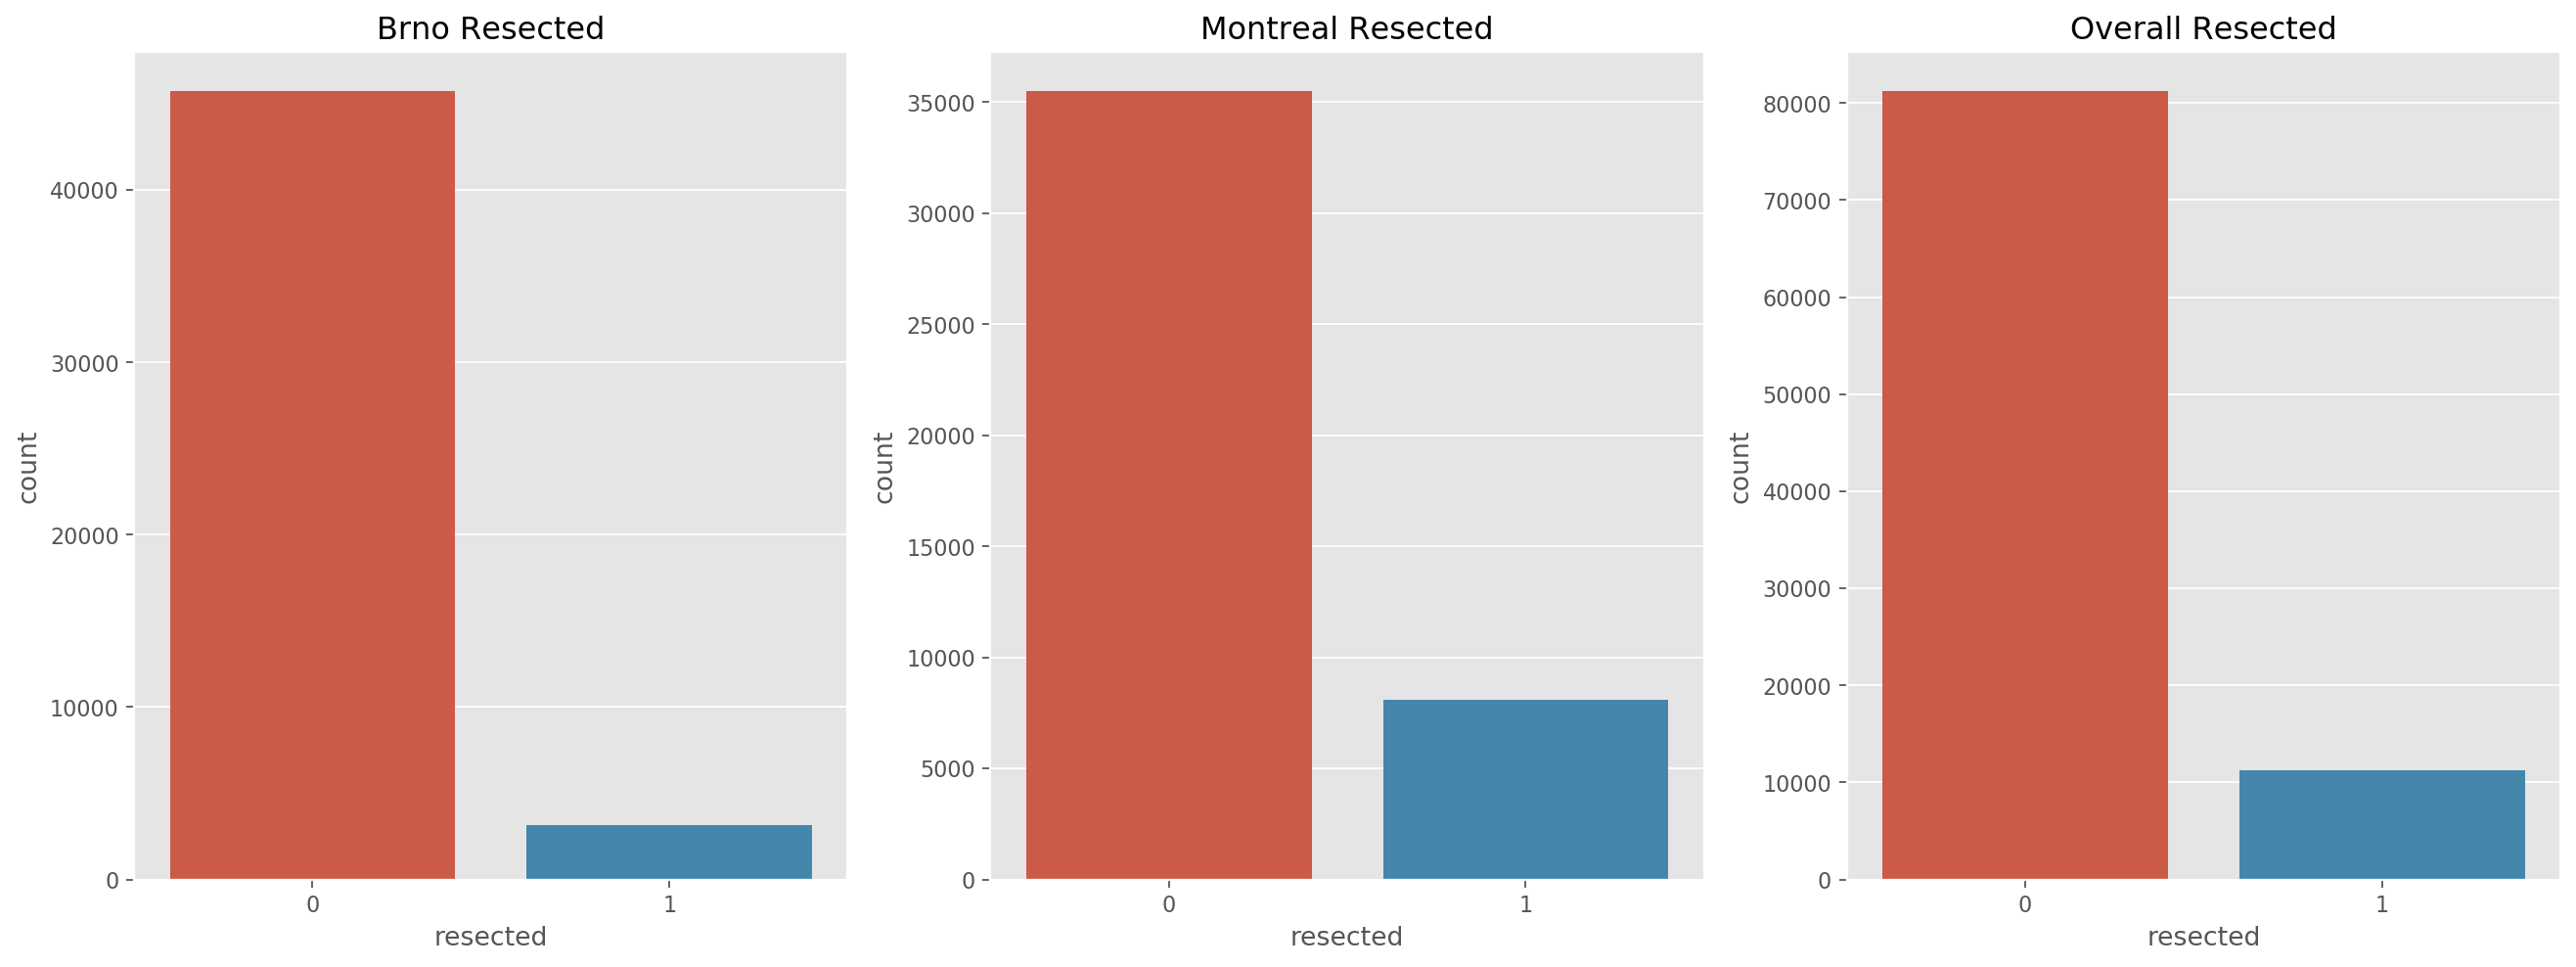

In [14]:
# Resected countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('resected', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Resected')

sns.countplot('resected', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Resected')

sns.countplot('resected', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Resected')

plt.show()

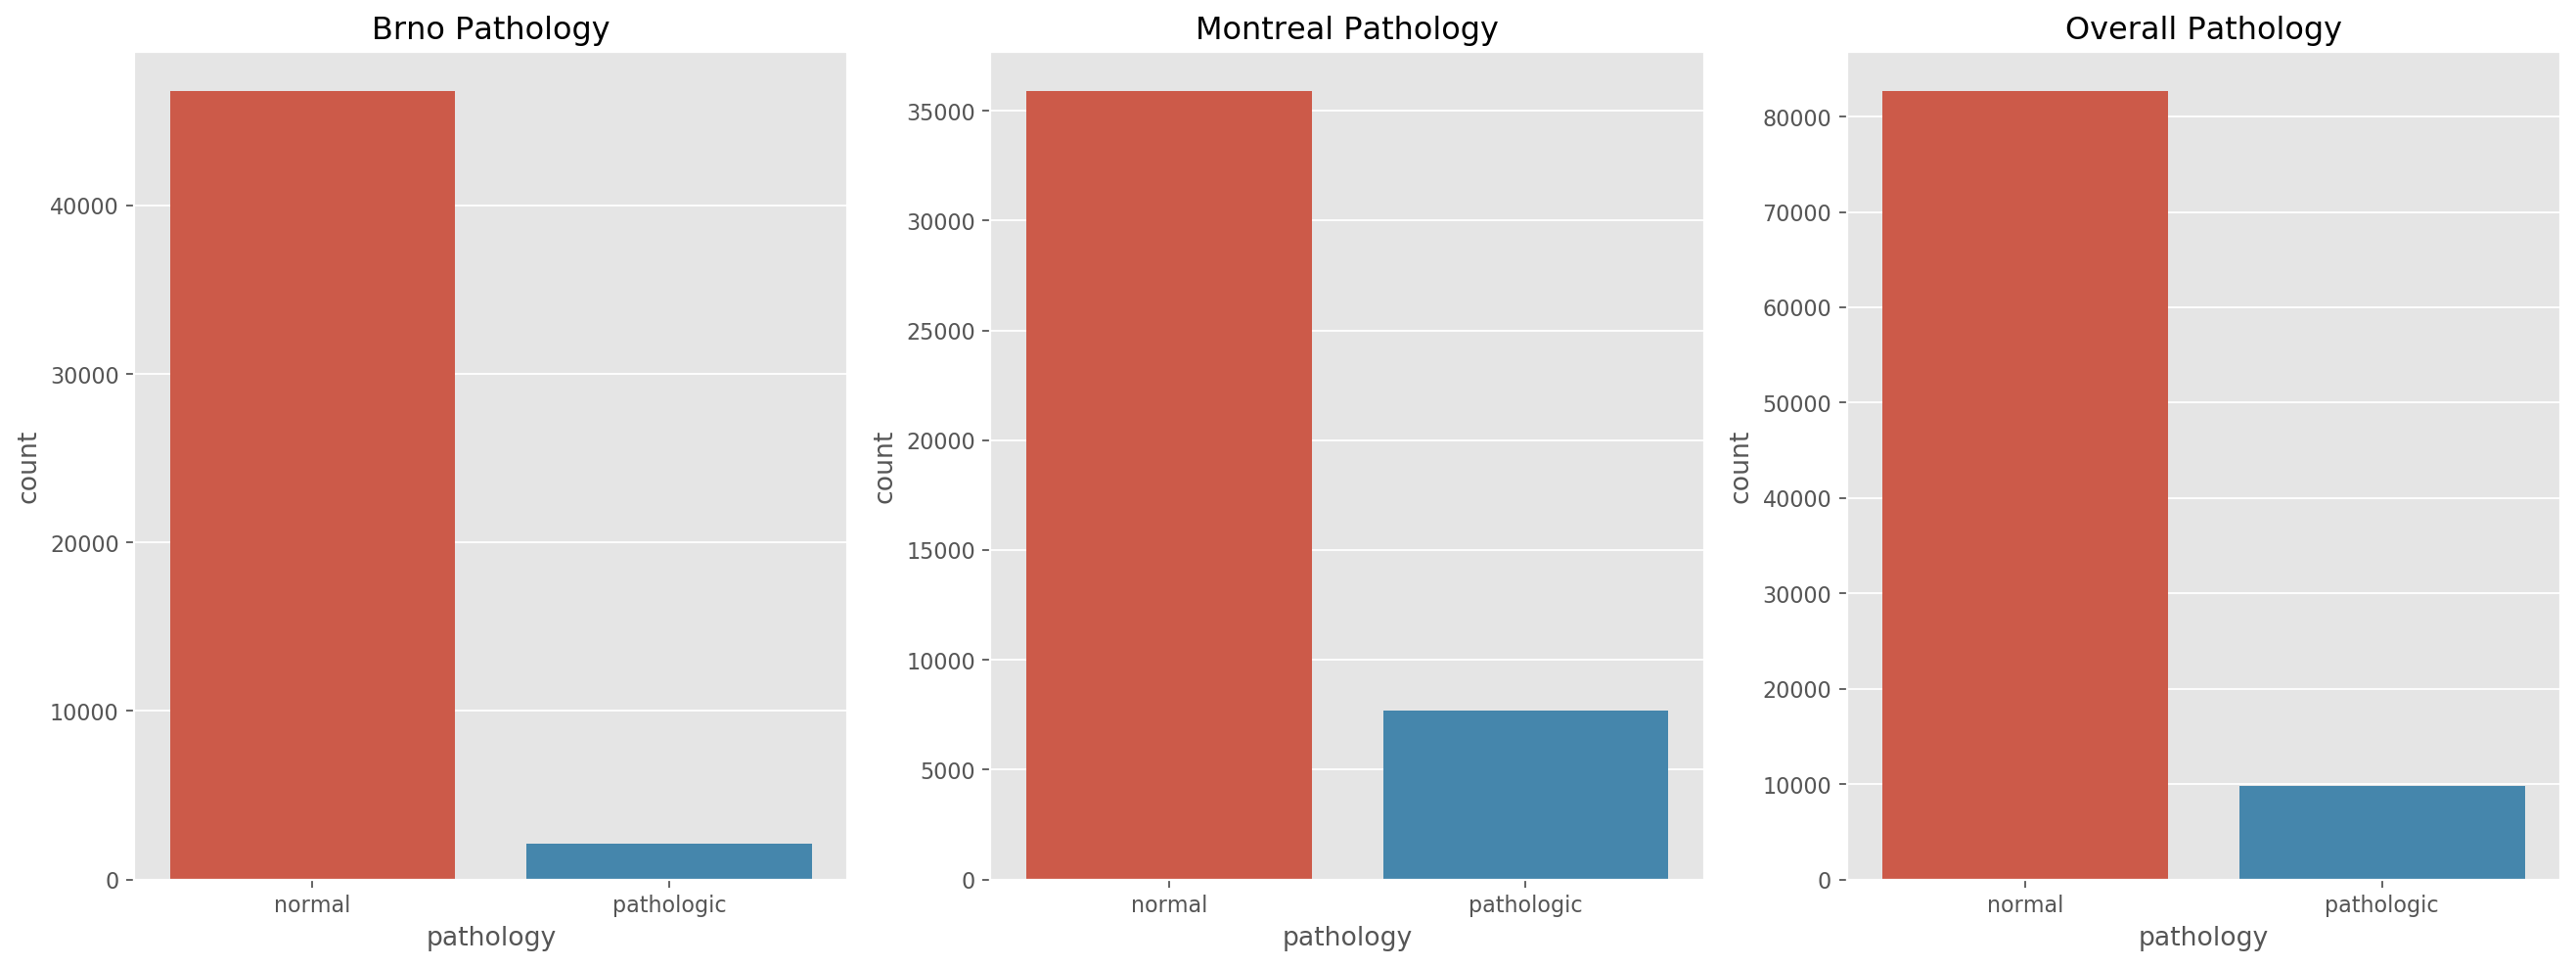

In [15]:
# Pathology countplot

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('pathology', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Pathology')

sns.countplot('pathology', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Pathology')

sns.countplot('pathology', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Pathology')

plt.show()

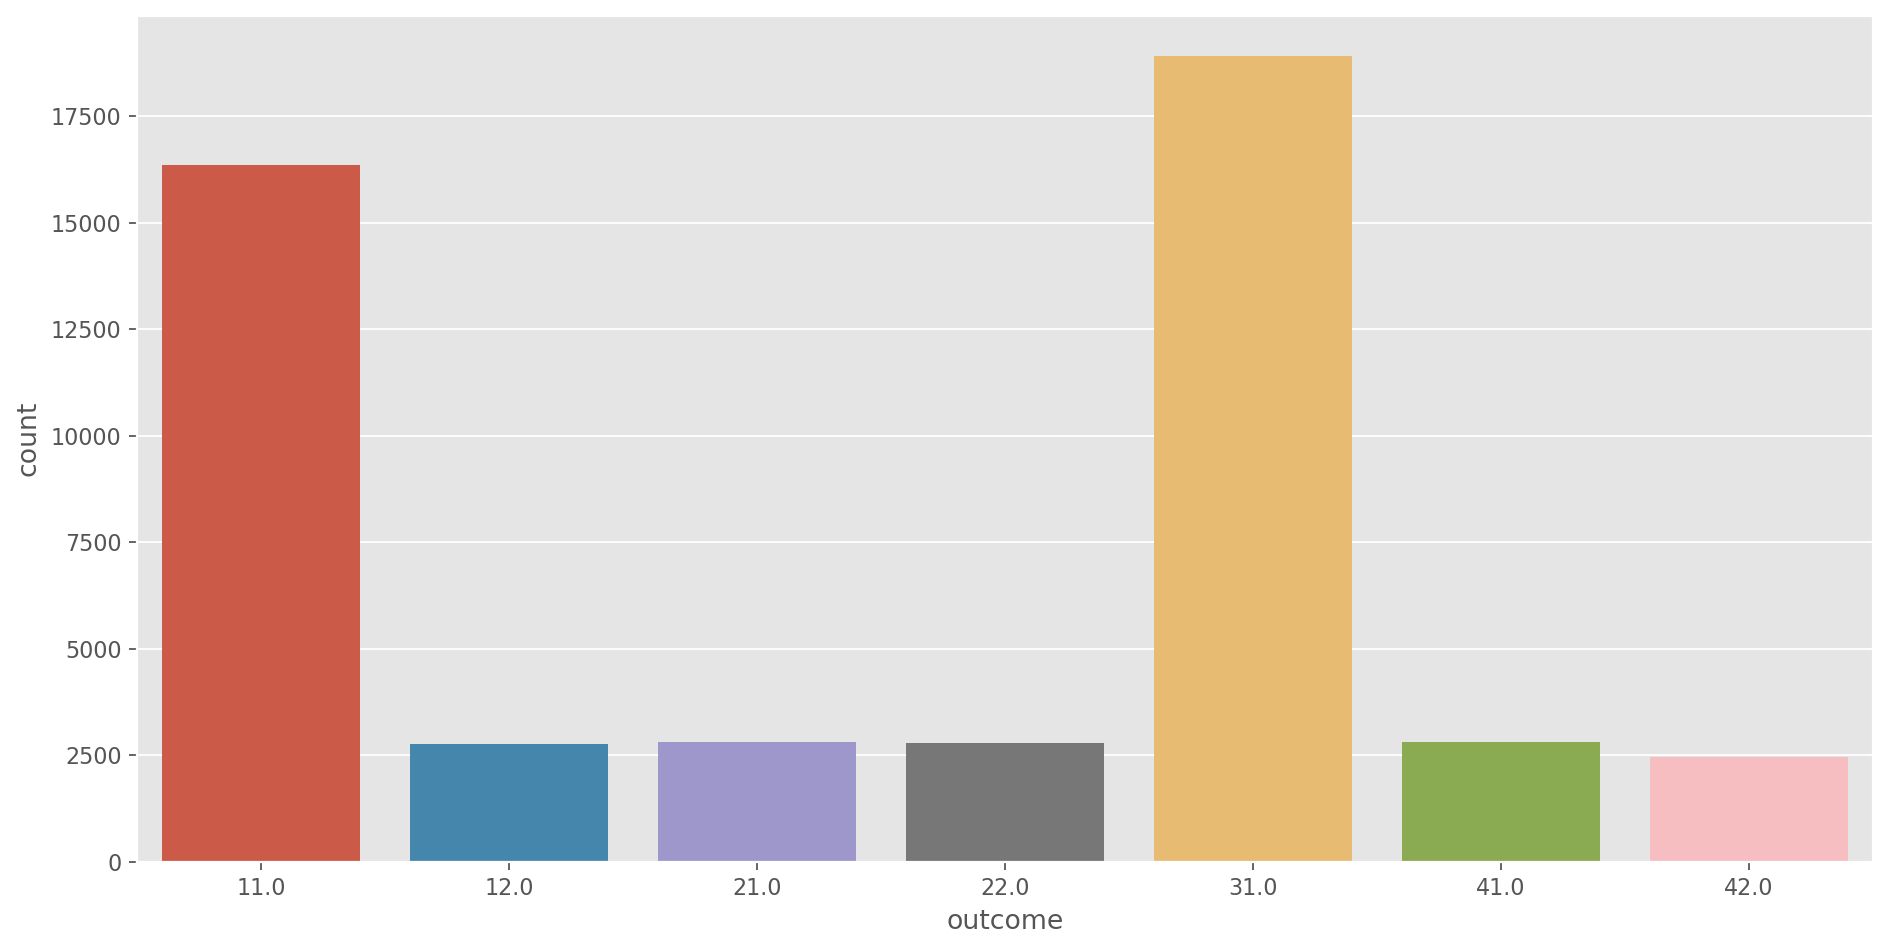

In [16]:
# Brno oucome countplot

sns.countplot('outcome', data = df_brno);

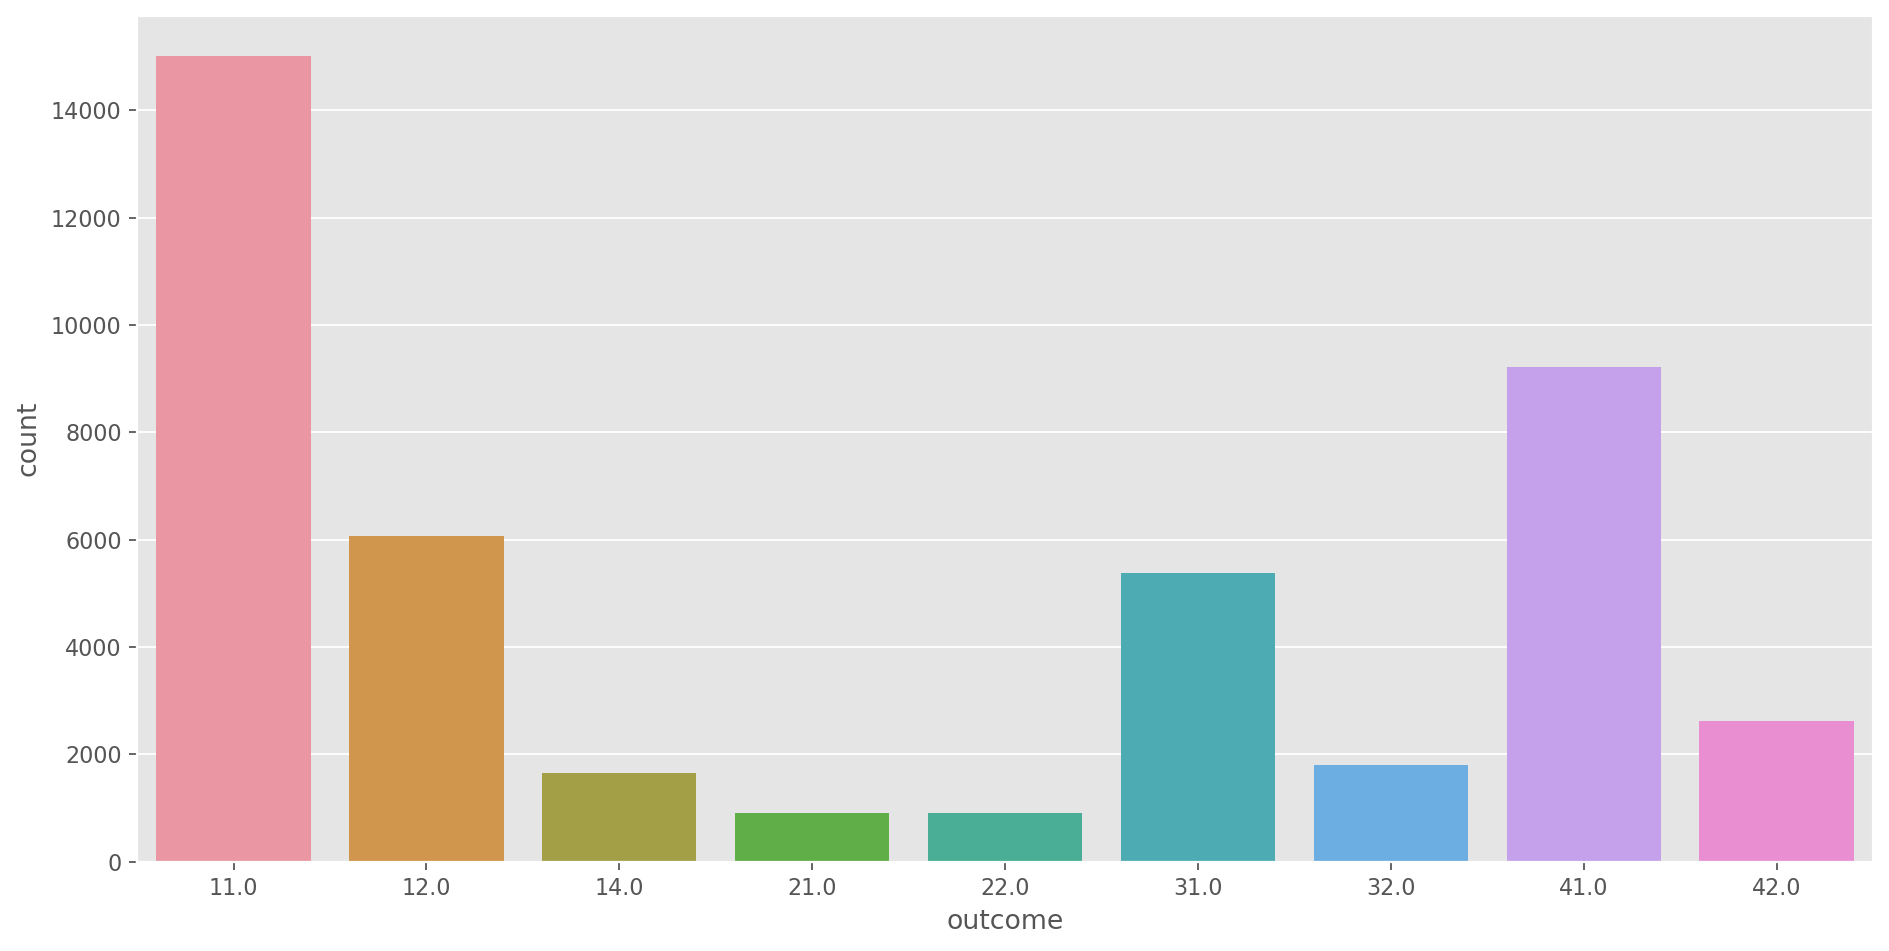

In [17]:
# Montreal oucome countplot

sns.countplot('outcome', data = df_montreal);

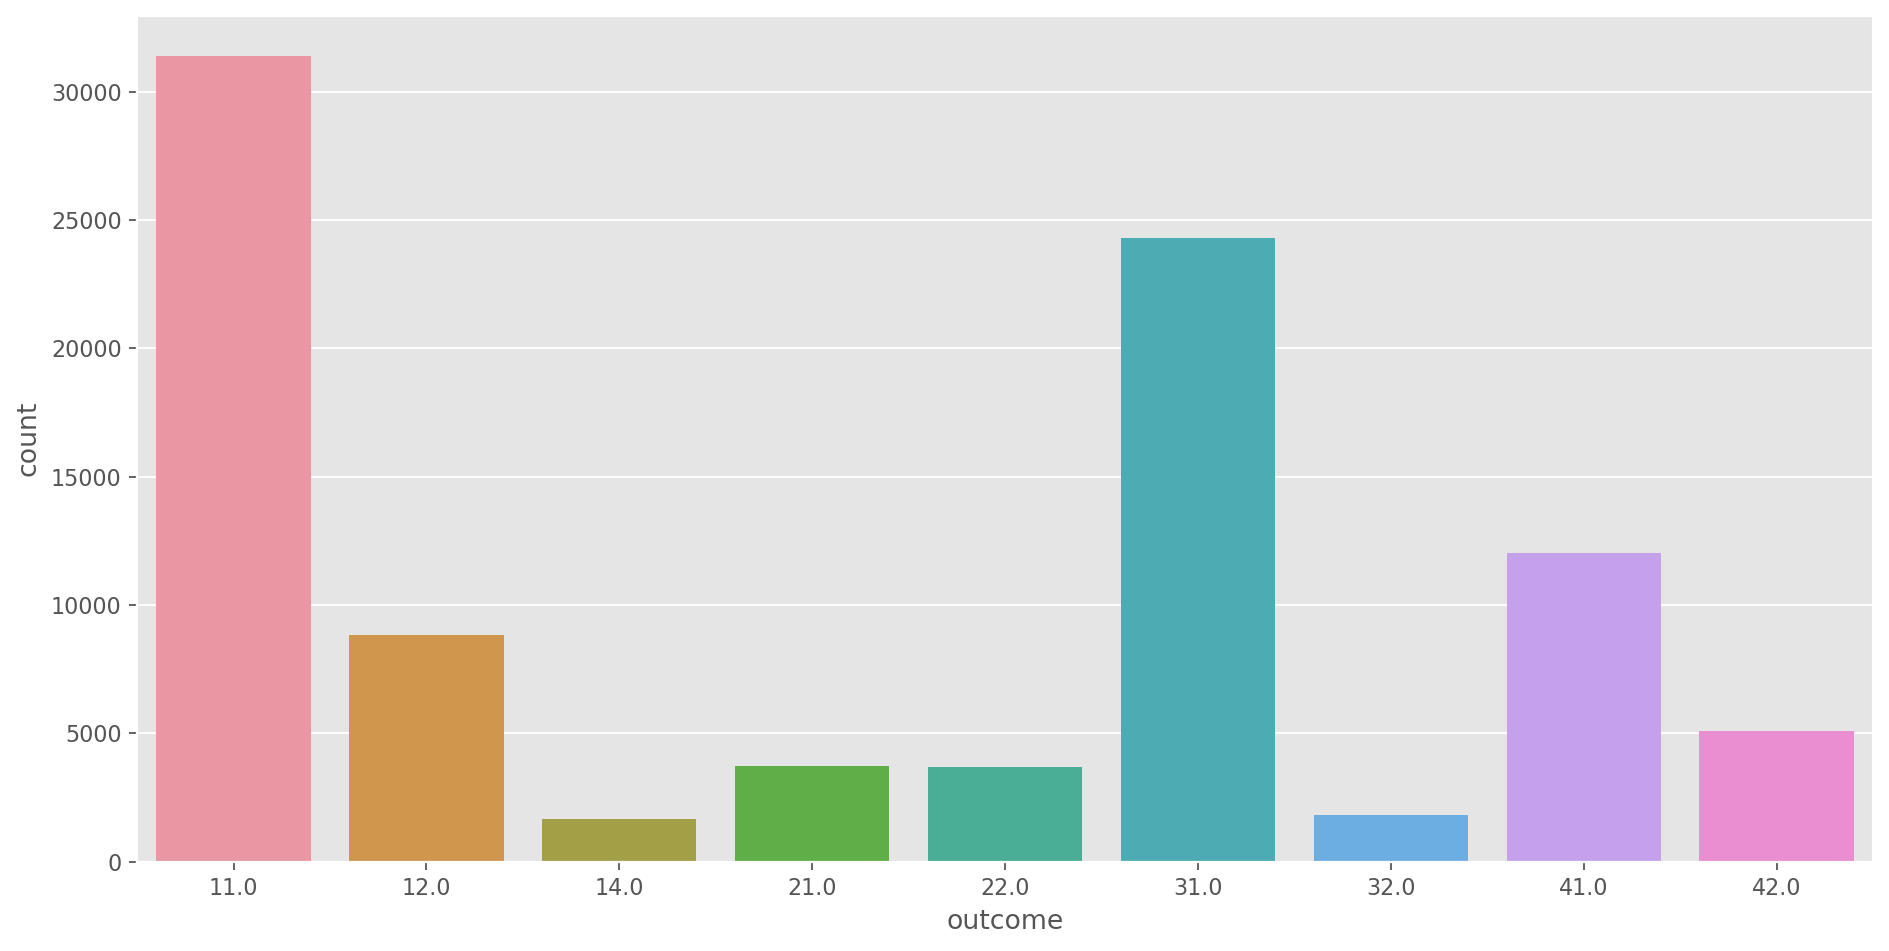

In [18]:
# Overall oucome countplot

sns.countplot('outcome', data = epilepsy);
#sns.distplot(epilepsy['outcome']);
#sns.kdeplot(epilepsy['outcome'], shade = True);

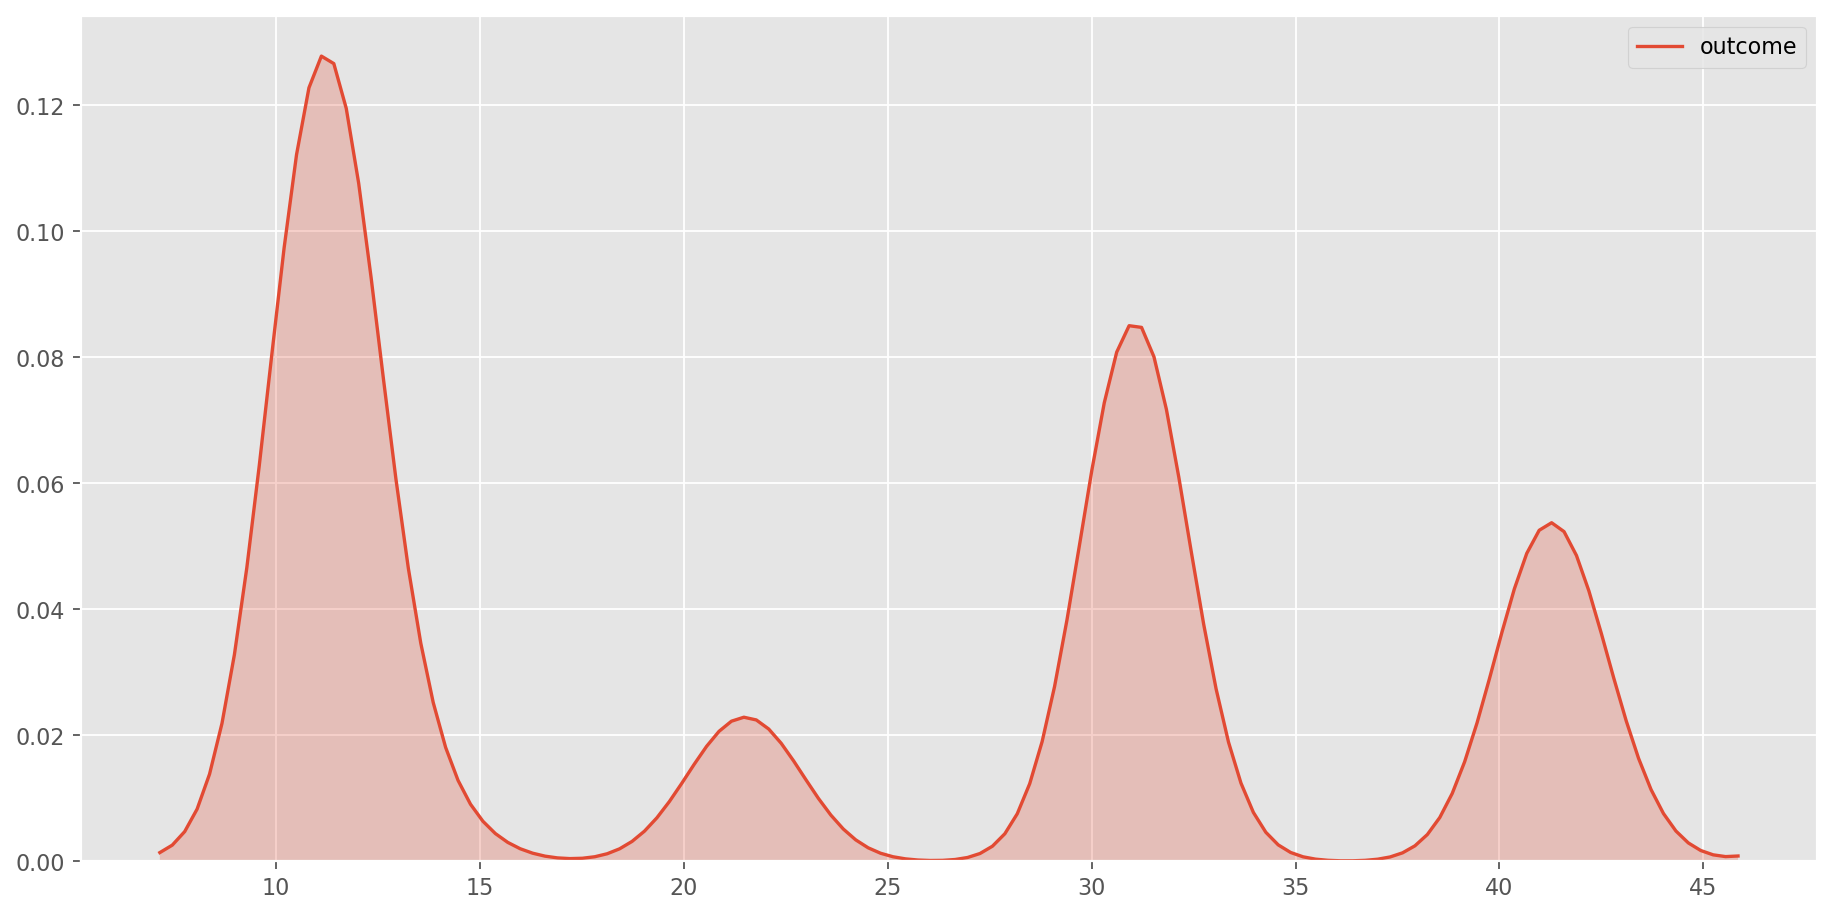

In [19]:
# Overall outcome KDE plot 

sns.kdeplot(epilepsy['outcome'], shade = True);

In [20]:
# Country column

epilepsy.loc[epilepsy['patient_id'] < 100 , 'country'] = 'Brno' 
epilepsy.loc[epilepsy['patient_id'] > 100 , 'country'] = 'Montreal' 
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0,Montreal
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0,Montreal
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0,Montreal
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0,Montreal
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0,Montreal


In [21]:
# Onset channels in numbers

epilepsy.groupby(['country', 'onset_channel'])['onset_channel'].count()

country   onset_channel
Brno      NON_SOZ          46784
          SOZ               2112
Montreal  NON_SOZ          35888
          SOZ               7680
Name: onset_channel, dtype: int64

In [22]:
# Resected in numbers

epilepsy.groupby(['country', 'resected'])['resected'].count()

country   resected
Brno      0           45728
          1            3168
Montreal  0           35488
          1            8080
Name: resected, dtype: int64

In [23]:
# Pathology in numbers

epilepsy.groupby(['country', 'pathology'])['pathology'].count()

country   pathology 
Brno      normal        46784
          pathologic     2112
Montreal  normal        35888
          pathologic     7680
Name: pathology, dtype: int64

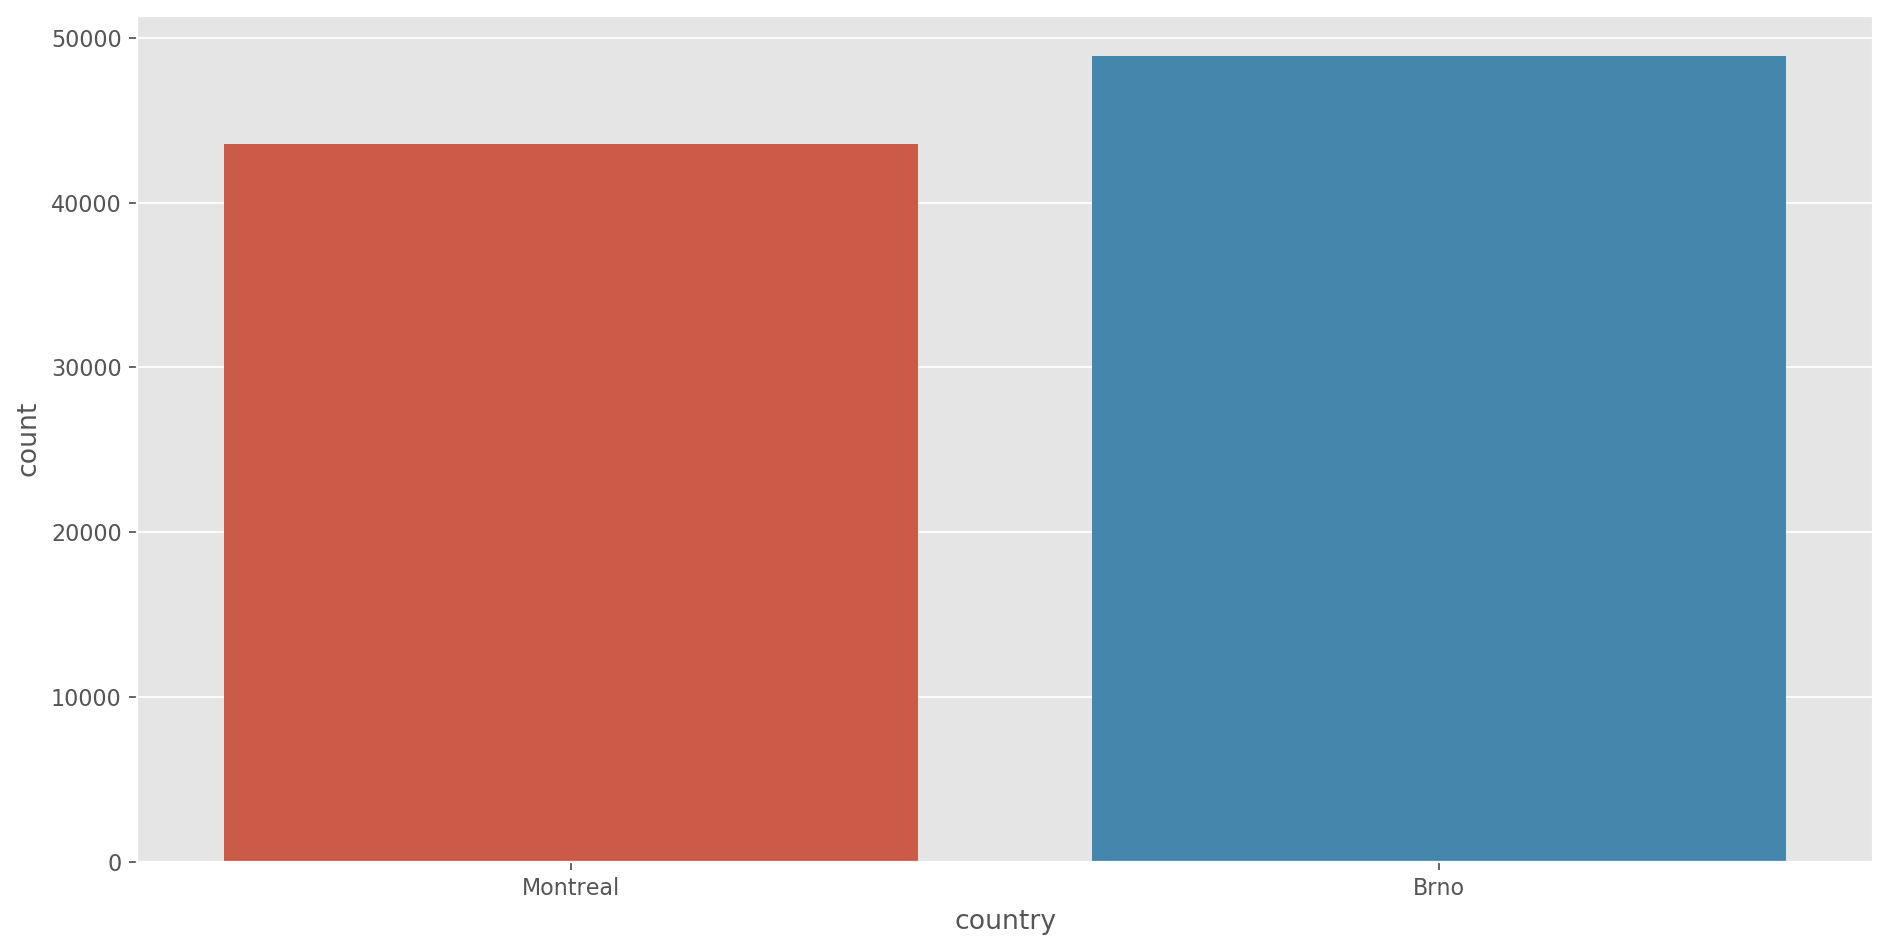

In [24]:
# Country countplot

sns.countplot('country', data = epilepsy);

In [25]:
# Country in numbers

epilepsy['country'].value_counts()

Brno        48896
Montreal    43568
Name: country, dtype: int64

In [26]:
# Number of patients

epilepsy['patient_id'].nunique()

53

In [27]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

19

In [28]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

34

In [29]:
# Number of unique channel names 

epilepsy['channel_name'].nunique()

1740

In [30]:
# Number of outcome per country

epilepsy.groupby(['country', 'outcome'])['outcome'].count()

country   outcome
Brno      11.0       16368
          12.0        2768
          21.0        2800
          22.0        2784
          31.0       18912
          41.0        2800
          42.0        2464
Montreal  11.0       15008
          12.0        6064
          14.0        1648
          21.0         912
          22.0         912
          31.0        5376
          32.0        1808
          41.0        9216
          42.0        2624
Name: outcome, dtype: int64

In [31]:
# Number of spike rates 

epilepsy['spike_rate'].nunique()

429

In [32]:
# Number of segm_type per country

epilepsy.groupby(['country', 'segm_type'])['segm_type'].count()

country   segm_type
Brno      0            9168
          1            3056
          2            3056
          3            3056
          4            3056
          8            9168
          9            3056
          10           3056
          11           3056
          12           9168
Montreal  0            8169
          1            2723
          2            2723
          3            2723
          4            2723
          8            8169
          9            2723
          10           2723
          11           2723
          12           8169
Name: segm_type, dtype: int64

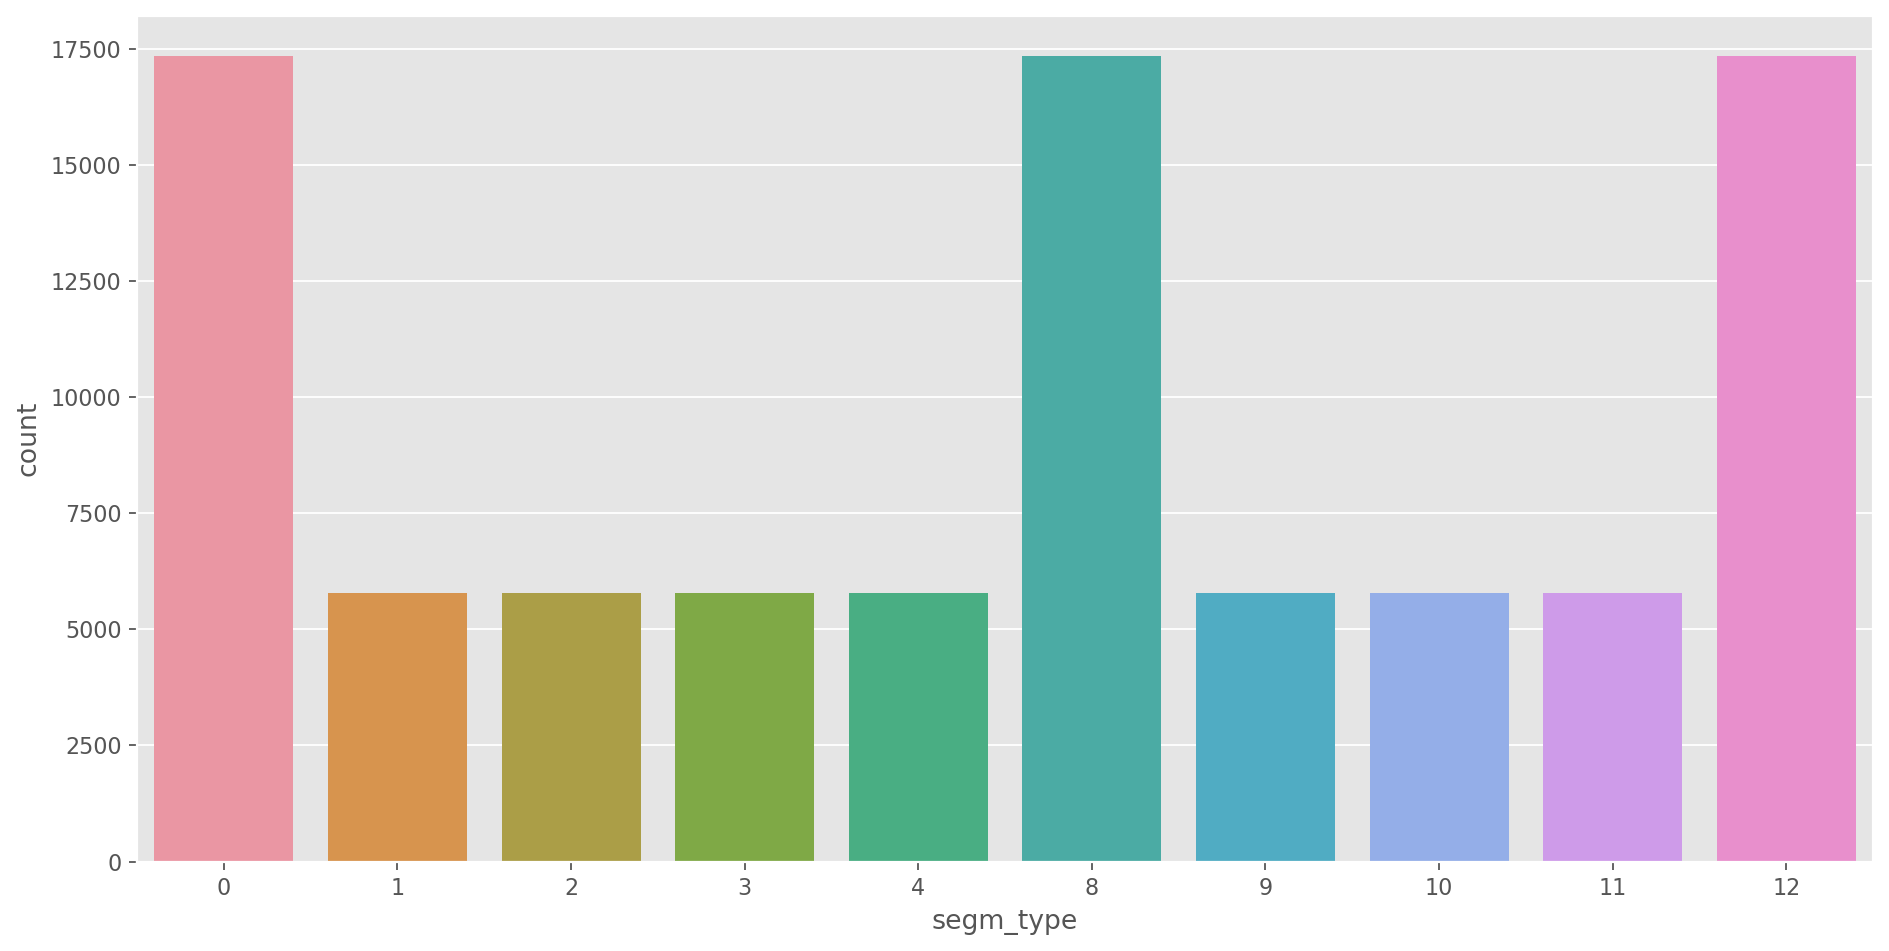

In [33]:
# Overall segm type countplot 

sns.countplot('segm_type', data = epilepsy);

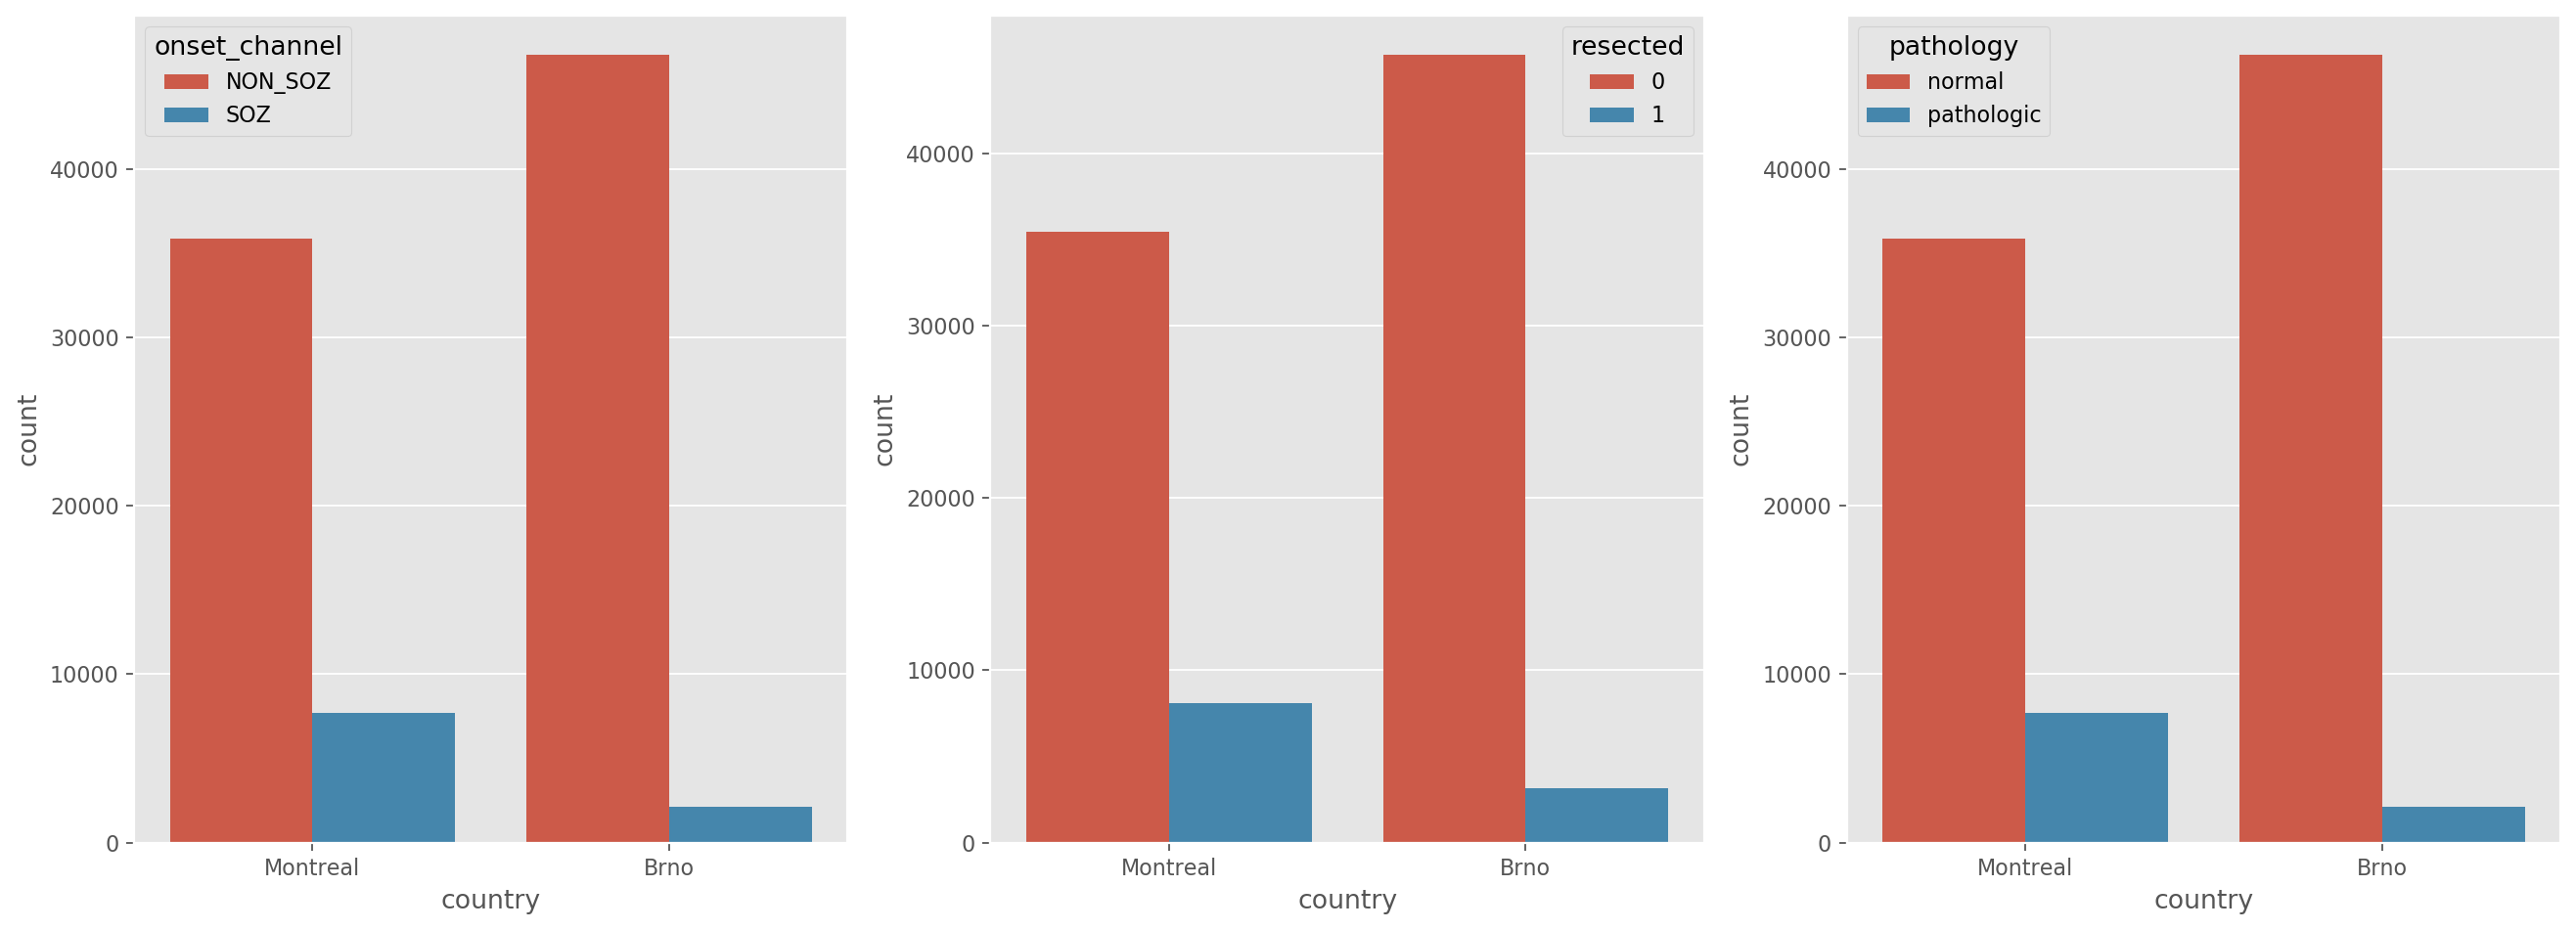

In [34]:
# Onset channels, resected, pathology countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('country', data = epilepsy, hue = 'onset_channel', ax = ax[0] );
sns.countplot('country', data = epilepsy, hue = 'resected', ax = ax[1] );
sns.countplot('country', data = epilepsy, hue = 'pathology', ax = ax[2] );

plt.show()

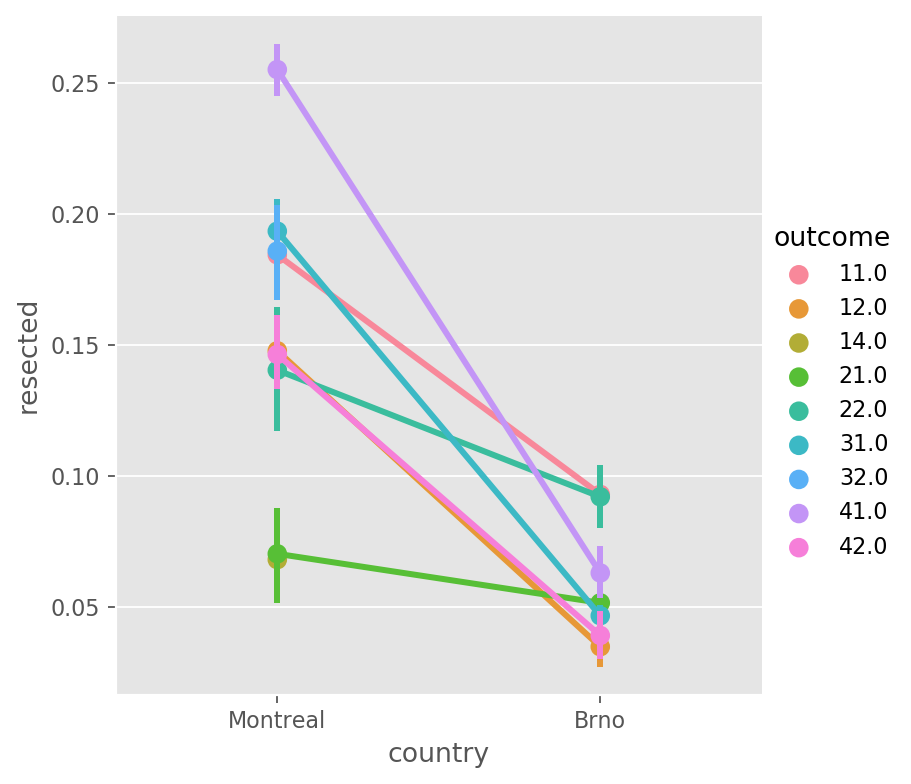

In [35]:
# Overall outcome per country catplot 

sns.catplot(x = 'country', y = 'resected', kind = 'point', data = epilepsy, hue = 'outcome');

In [36]:
# Elipepsy dataframe with datatypes

epilepsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92464 entries, 0 to 92463
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   92464 non-null  int64  
 1   channel_name                 92464 non-null  object 
 2   resected                     92464 non-null  int64  
 3   onset_channel                92464 non-null  object 
 4   pathology                    92464 non-null  object 
 5   outcome                      92464 non-null  float64
 6   HFO_65.0-80.0                92464 non-null  int64  
 7   HFO_80.0-250.0               92464 non-null  int64  
 8   HFO_250.0-600.0              92464 non-null  int64  
 9   spike_rate                   92464 non-null  int64  
 10  power_1.0-4.0                91851 non-null  float64
 11  power_4.0-8.0                91851 non-null  float64
 12  power_8.0-12.0               91851 non-null  float64
 13  power_12.0-20.0 

In [40]:
# Drop columns no. 0, 1, 2, 3 and 5 

df_epilepsy = epilepsy.drop(epilepsy.columns[[0, 1, 2, 3, 5]], axis=1)
df_brno = df_brno.drop(df_brno.columns[[0, 1, 2, 3, 5]], axis=1)
df_montreal = df_montreal.drop(df_montreal.columns[[0, 1, 2, 3, 5]], axis=1)

In [41]:
# Columns names

df_cols = df_epilepsy.columns
print(list(df_cols))

['pathology', 'HFO_65.0-80.0', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'phase_const_0.0-0.0', 'pli_0.0-0.0', 'pli_tau_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'phase_const_1.0-4.0', 'pli_1.0-4.0', 'pli_tau_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'phase_const_4.0-8.0', 'pli_4.0-8.0', 'pli_tau_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'phase_const_8.0-12.0', 'pli_8.0-12.0', 'pli_tau_8.0-12.0', 'coherence_8.0-12.0', 'lin_corr_median

In [42]:
# Remove country columns

df_epilepsy = df_epilepsy.drop(['country'], axis=1)

In [45]:
# Correlatin matrix + rounding

df_corrmat = df_epilepsy.corr()
#pd.options.display.float_format = '{:.3f}'.format
df_corrmat.round(3)

,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
HFO_65.0-80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HFO_80.0-250.0,NaN,1.000,0.429,0.653,0.006,-0.046,-0.062,-0.063,-0.033,0.048,...,-0.024,-0.023,0.256,-0.027,-0.033,-0.035,0.040,-0.032,0.008,0.008
HFO_250.0-600.0,NaN,0.429,1.000,0.197,0.139,0.171,0.144,0.097,0.165,0.305,...,0.240,0.252,0.017,0.256,0.054,0.058,-0.021,0.255,-0.032,0.082
spike_rate,NaN,0.653,0.197,1.000,-0.034,-0.080,-0.092,-0.075,-0.070,-0.040,...,-0.069,-0.056,0.344,-0.057,0.028,0.028,-0.009,-0.061,0.005,-0.009
power_1.0-4.0,NaN,0.006,0.139,-0.034,1.000,0.825,0.614,0.518,0.302,0.268,...,0.508,0.497,-0.349,0.507,0.070,0.065,-0.014,0.506,-0.022,-0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pli_250.0-600.0,NaN,-0.035,0.058,0.028,0.065,0.112,0.151,0.172,0.103,0.019,...,0.185,0.183,-0.139,0.193,0.996,1.000,-0.502,0.193,-0.005,-0.028
pli_tau_250.0-600.0,NaN,0.040,-0.021,-0.009,-0.014,-0.029,-0.083,-0.197,-0.078,-0.008,...,-0.090,-0.087,0.072,-0.095,-0.457,-0.502,1.000,-0.094,-0.012,0.022
coherence_250.0-600.0,NaN,-0.032,0.255,-0.061,0.506,0.452,0.456,0.369,0.235,0.200,...,0.921,0.990,-0.640,0.998,0.192,0.193,-0.094,1.000,0.031,0.011
segm_type,NaN,0.008,-0.032,0.005,-0.022,-0.027,-0.039,-0.033,-0.050,-0.048,...,0.008,0.034,0.013,0.028,-0.004,-0.005,-0.012,0.031,1.000,0.065


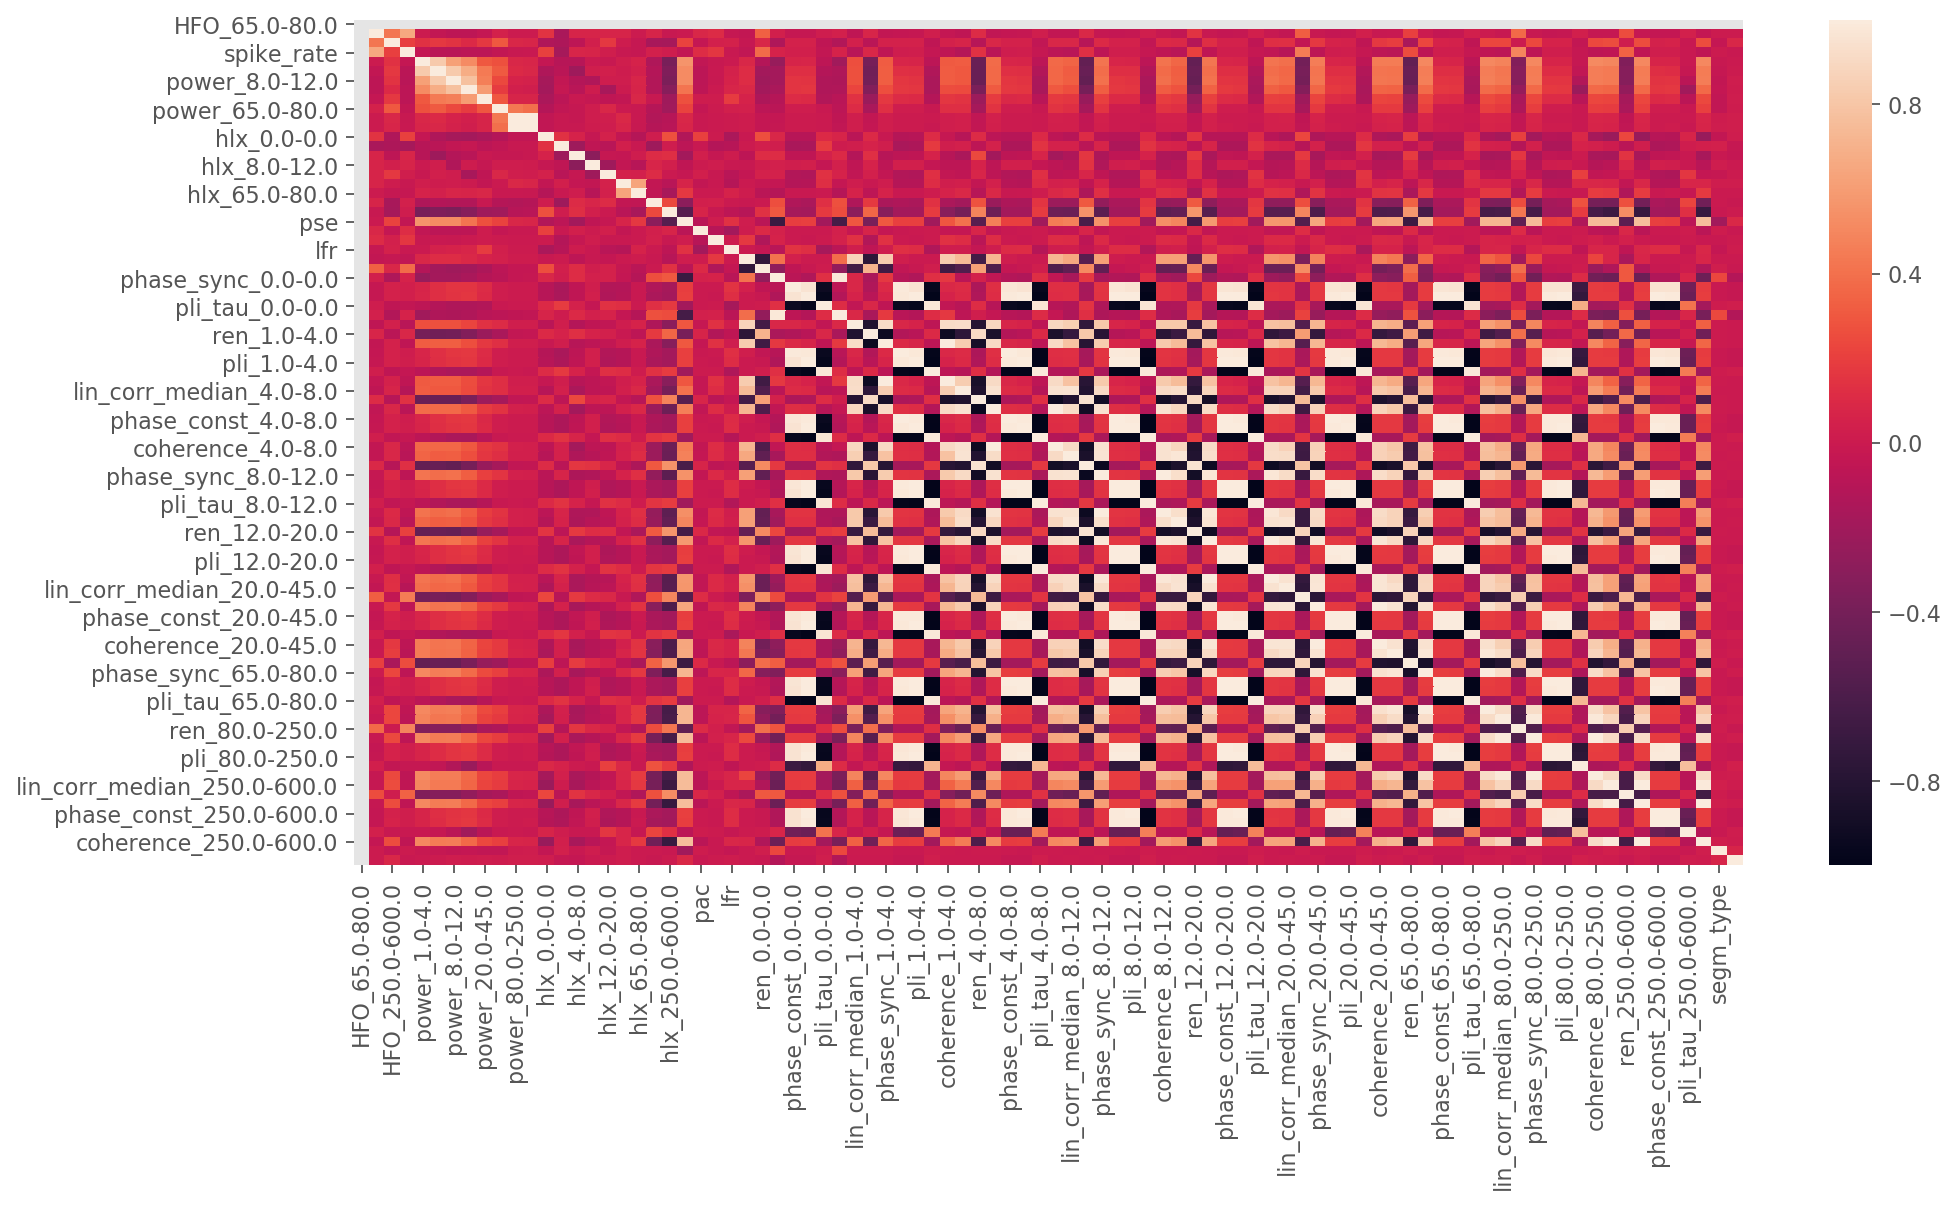

In [46]:
# Correlation matrix heatmap

sns.heatmap(df_corrmat);

In [47]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.333-b02, mixed mode)
  Starting server from C:\Users\marek\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\marek\AppData\Local\Temp\tmpi22nazg6
  JVM stdout: C:\Users\marek\AppData\Local\Temp\tmpi22nazg6\h2o_Rodina_started_from_python.out
  JVM stderr: C:\Users\marek\AppData\Local\Temp\tmpi22nazg6\h2o_Rodina_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,2 months and 7 days
H2O_cluster_name:,H2O_from_python_Rodina_4lhhvr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.531 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [48]:
# Parse dataframe df_epilepsy to H2o

h2o_df = h2o.H2OFrame(df_epilepsy)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [49]:
# Dataframe summary describe

h2o_df.describe()

Rows:92464
Cols:91




,pathology,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
type,enum,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,int,int
mins,,0.0,0.0,0.0,0.0,2.364873452899435e-09,5.991071834409485e-10,1.30442119819651e-10,1.1681560430904823e-10,7.101002637861296e-11,2.7499975461833418e-12,9.00901396503794e-12,1.791892948869557e-12,1.3057179148991902,1.0262446661790212,1.024207173784574,1.009632244706154,1.0085392993688584,1.000543340841929,1.003492754101753,1.007588633298874,1.0338828110694884,4.1345508072694234e-08,-0.0696039786934852,-0.0550748613497449,0.0001713543694596,-0.7683093715831637,0.0007888324235439,0.0609050278140542,0.0,0.0,-218.58333333333331,0.3285223725189765,-0.8999604328970114,0.0002853959685614,0.4160011687564353,0.0,0.0,-219.0,0.7514204303423564,-0.7575910468026996,0.0002662190965012,0.3625855857071777,0.0,0.0,-111.8,0.7670663423339525,-0.7077642927538059,0.0001355320757778,0.3679261469530562,0.0,0.0,-77.29333333333332,0.8077897173166275,-0.5553509854665026,8.274119297719079e-05,0.2741534049808979,0.0,0.0,-47.333333333333336,0.7843798479437828,-0.5645505384852488,4.150115938661732e-05,0.0709188060369342,0.0,0.0,-14.853333333333332,0.3186498494446277,-0.6008368995630493,1.789600557098462e-05,0.1924236926358814,0.0,0.0,-11.148333333333332,0.787879088918368,-0.8790900172789892,8.82198939166301e-06,0.0749742081714794,0.0,0.0,-3.4,0.4139111252129078,-0.6287160007655621,1.3262518922279773e-05,0.0448328197945375,0.0,0.0,-0.7066666666666667,0.6452274606625239,0.0,0.0
mean,,0.0,18.444627098113866,32.607555372901885,19.15956480359924,0.3177411289930441,0.2887089649784865,0.2387288507096535,0.305644353557819,0.26820519354568745,0.030839306096751853,0.30305736107002035,0.06613973068376133,25.468047817497773,1.2986081767210929,1.0664536302477632,1.0232427683848584,1.035715813018905,1.0991700924938745,1.006514229243794,1.2024770751014844,1.0879688029789023,0.23646564369234294,0.0006395562988738207,0.0005580658050945333,0.19130648486919796,0.7504558443010173,0.17972892324090786,0.8270043440369235,0.022543507331329486,0.0407630917933711,-3.524358611304488,0.9396248568418886,0.8137664897449305,0.1840

In [50]:
# Split train and test sets

train, test = h2o_df.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'pathology'
X.remove(y)

In [51]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'pathology'

In [52]:
# Review dataframe if balanced or not 

df_epilepsy.pathology.value_counts()

normal        82672
pathologic     9792
Name: pathology, dtype: int64

In [53]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [54]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |
20:50:07.559: AutoML: XGBoost is not available; skipping it.
20:50:07.671: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

███
20:50:21.538: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

████
20:51:00.593: _train param, Dropping unused columns: [HFO_65.0-80.0]


20:51:02.634: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

██
20:51:20.753: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

██
20:51:42.527: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

██
20:52:05.560: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

███
20:52:32.393: _train param, Dropping unused columns: [HFO_65.0-80.0]


20:52:34.311: _train param, Dropping unused columns: [HFO_65.0-80.0]

█
20:52:37.139: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

██
20:52:56.792: _train param, Dropping bad and constant columns: [HFO_65.0-80.0]

██
20:53:16.813: _train param, Dropping b

,,normal,pathologic,Error,Rate
0,normal,8936.0,1.0,0.0001,(1.0/8937.0)
1,pathologic,2.0,1033.0,0.0019,(2.0/1035.0)
2,Total,8938.0,1034.0,0.0003,(3.0/9972.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.780789,0.998550,102.0
1,max f2,0.780789,0.998261,102.0
2,max f0point5,0.780789,0.998840,102.0
3,max accuracy,0.780789,0.999699,102.0
4,max precision,0.998602,1.000000,0.0
5,max recall,0.246638,1.000000,136.0
6,max specificity,0.998602,1.000000,0.0
7,max absolute_mcc,0.780789,0.998382,102.0
8,max min_per_class_accuracy,0.361714,0.998210,115.0
9,max mean_per_class_accuracy,0.780789,0.998978,102.0



Gains/Lift Table: Avg response rate: 10.38 %, avg score: 11.63 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010028,0.996426,9.634783,9.634783,1.000000,0.997766,1.000000,0.997766,0.096618,0.096618,863.478261,863.478261,0.096618
1,2,0.020056,0.993827,9.634783,9.634783,1.000000,0.995165,1.000000,0.996466,0.096618,0.193237,863.478261,863.478261,0.193237
2,3,0.030084,0.990894,9.634783,9.634783,1.000000,0.992367,1.000000,0.995099,0.096618,0.289855,863.478261,863.478261,0.289855
3,4,0.040012,0.988009,9.634783,9.634783,1.000000,0.989502,1.000000,0.993711,0.095652,0.385507,863.478261,863.478261,0.385507
4,5,0.050040,0.985108,9.634783,9.634783,1.000000,0.986671,1.000000,0.992300,0.096618,0.482126,863.478261,863.478261,0.482126
5,6,0.100080,0.937972,9.634783,9.634783,1.000000,0.971506,1.000000,0.981903,0.482126,0.964251,863.478261,863.478261,0.964251
6,7,0.150020,0.065840,0.715837,6.665775,0.074297,0.196151,0.691845,0.720336,0.035749,1.000000,-28.416274,566.577540,0.948417
7,8,0.200060,0.035458,0.000000,4.998496,0.000000,0.047376,0.518797,0.552011,0.000000,1.000000,-100.000000,399.849624,0.892581
8,9,0.300040,0.015863,0.000000,3.332888,0.000000,0.023571,0.345922,0.375923,0.000000,1.000000,-100.000000,233.288770,0.781023
9,10,0.400020,0.009312,0.000000,2.499875,0.000000,0.012146,0.259464,0.285002,0.000000,1.000000,-100.000000,149.987466,0.669464




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.03615843861098762
RMSE: 0.19015372363166497
LogLoss: 0.12283780405957465
Null degrees of freedom: 6955
Residual degrees of freedom: 6950
Null deviance: 4796.809181024826
Residual deviance: 1708.9195300768026
AIC: 1720.9195300768026
AUC: 0.972833342156507
AUCPR: 0.858275820663452
Gini: 0.9456666843130139

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27596868424520377: 


,,normal,pathologic,Error,Rate
0,normal,5972.0,225.0,0.0363,(225.0/6197.0)
1,pathologic,142.0,617.0,0.1871,(142.0/759.0)
2,Total,6114.0,842.0,0.0528,(367.0/6956.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.275969,0.770768,215.0
1,max f2,0.149353,0.825443,268.0
2,max f0point5,0.754702,0.808471,89.0
3,max accuracy,0.583738,0.950834,131.0
4,max precision,0.998650,1.000000,0.0
5,max recall,0.003065,1.000000,391.0
6,max specificity,0.998650,1.000000,0.0
7,max absolute_mcc,0.275969,0.742322,215.0
8,max min_per_class_accuracy,0.101824,0.911731,292.0
9,max mean_per_class_accuracy,0.149353,0.915442,268.0



Gains/Lift Table: Avg response rate: 10.91 %, avg score: 11.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010063,0.993394,9.164690,9.164690,1.000000,0.996636,1.000000,0.996636,0.092227,0.092227,816.469038,816.469038,0.092227
1,2,0.020127,0.983257,9.033766,9.099228,0.985714,0.989320,0.992857,0.992978,0.090909,0.183136,803.376623,809.922831,0.182974
2,3,0.030046,0.968064,9.164690,9.120840,1.000000,0.976354,0.995215,0.987490,0.090909,0.274045,816.469038,812.084019,0.273883
3,4,0.040109,0.936690,8.379145,8.934752,0.914286,0.954150,0.974910,0.979125,0.084321,0.358366,737.914549,793.475191,0.357237
4,5,0.050029,0.897741,8.367761,8.822331,0.913043,0.920815,0.962644,0.967564,0.083004,0.441370,736.776078,782.233126,0.439272
5,6,0.100058,0.432522,5.767434,7.294883,0.629310,0.691336,0.795977,0.829450,0.288538,0.729908,476.743446,629.488286,0.706993
6,7,0.150086,0.165285,3.081232,5.890333,0.336207,0.271768,0.642720,0.643556,0.154150,0.884058,208.123211,489.033261,0.823868
7,8,0.200115,0.074348,1.000742,4.667935,0.109195,0.110209,0.509339,0.510219,0.050066,0.934124,0.074205,366.793497,0.823909
8,9,0.300029,0.025633,0.461531,3.267144,0.050360,0.043583,0.356493,0.354823,0.046113,0.980237,-53.846883,226.714406,0.763519
9,10,0.400086,0.012840,0.118509,2.479702,0.012931,0.017904,0.270571,0.270563,0.011858,0.992095,-88.149107,147.970243,0.664517


In [55]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20220802_205006,0.972833,0.122838,0.858276,0.111698,0.190154,0.0361584
StackedEnsemble_AllModels_4_AutoML_1_20220802_205006,0.972833,0.122838,0.858276,0.111698,0.190154,0.0361584
GBM_grid_1_AutoML_1_20220802_205006_model_7,0.970351,0.168769,0.851148,0.107464,0.220218,0.0484961
StackedEnsemble_BestOfFamily_4_AutoML_1_20220802_205006,0.970106,0.125921,0.850603,0.128153,0.191494,0.0366701
GBM_grid_1_AutoML_1_20220802_205006_model_5,0.970091,0.174882,0.839883,0.129376,0.227689,0.0518424
StackedEnsemble_BestOfFamily_5_AutoML_1_20220802_205006,0.969888,0.126247,0.856583,0.134229,0.189206,0.0357991
GBM_grid_1_AutoML_1_20220802_205006_model_9,0.968969,0.193269,0.849398,0.134068,0.224665,0.0504746
StackedEnsemble_AllModels_1_AutoML_1_20220802_205006,0.968728,0.130156,0.840448,0.129605,0.195891,0.0383734
StackedEnsemble_AllModels_2_AutoML_1_20220802_205006,0.968653,0.130163,0.840343,0.130022,0.195885,0.0383709
StackedEnsemble_BestOfFamily_2_AutoML_1_20220802_205006,0.967526,0.131499,0.836897,0.130183,0.196659,0.0386747


In [56]:
# Explain a single H2O model (e.g. leader model from AutoML)

#exm = aml.leader.explain(test)

In [57]:
# Gradient boosting(GB) model 

model = h2o.get_model('GBM_grid_1_AutoML_1_20220802_205006_model_7')

In [58]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.04635115842177876
RMSE: 0.21529319176829248
LogLoss: 0.16180474420669766
Mean Per-Class Error: 0.12551019908384467
AUC: 0.9715653685028233
AUCPR: 0.8575216971682817
Gini: 0.9431307370056465

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09415384669388406: 


,,normal,pathologic,Error,Rate
0,normal,20134.0,567.0,0.0274,(567.0/20701.0)
1,pathologic,547.0,1899.0,0.2236,(547.0/2446.0)
2,Total,20681.0,2466.0,0.0481,(1114.0/23147.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.094154,0.773208,299.0
1,max f2,0.033600,0.811834,341.0
2,max f0point5,0.246463,0.820807,235.0
3,max accuracy,0.200587,0.954076,250.0
4,max precision,0.989783,1.000000,0.0
5,max recall,0.000544,1.000000,397.0
6,max specificity,0.989783,1.000000,0.0
7,max absolute_mcc,0.094154,0.746297,299.0
8,max min_per_class_accuracy,0.023883,0.908831,351.0
9,max mean_per_class_accuracy,0.025432,0.910995,349.0



Gains/Lift Table: Avg response rate: 10.57 %, avg score:  5.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,0.931610,9.422416,9.422416,0.995690,0.961245,0.995690,0.961245,0.094440,0.094440,842.241556,842.241556,0.094392
1,2,0.020003,0.850330,9.340306,9.381450,0.987013,0.892118,0.991361,0.926756,0.093213,0.187653,834.030646,838.144968,0.187460
2,3,0.030025,0.737168,9.259257,9.340660,0.978448,0.795464,0.987050,0.882929,0.092805,0.280458,825.925684,834.066013,0.280023
3,4,0.040005,0.604179,8.930644,9.238377,0.943723,0.673405,0.976242,0.830661,0.089125,0.369583,793.064390,823.837746,0.368520
4,5,0.050028,0.487989,8.198725,9.030088,0.866379,0.547906,0.954231,0.774013,0.082175,0.451758,719.872522,803.008790,0.449198
5,6,0.100013,0.111151,5.929839,7.480633,0.626621,0.259926,0.790497,0.517081,0.296402,0.748160,492.983906,648.063308,0.724731
6,7,0.149998,0.035099,2.625487,5.862717,0.277442,0.063161,0.619528,0.365818,0.131235,0.879395,162.548736,486.271730,0.815582
7,8,0.200026,0.016624,1.062363,4.662110,0.112263,0.024234,0.492657,0.280385,0.053148,0.932543,6.236328,366.211040,0.819070
8,9,0.299996,0.006405,0.421223,3.248888,0.044512,0.010309,0.343318,0.190386,0.042110,0.974652,-57.877695,224.888843,0.754373
9,10,0.400009,0.003310,0.151248,2.474395,0.015983,0.004602,0.261475,0.143935,0.015127,0.989779,-84.875223,147.439463,0.659457


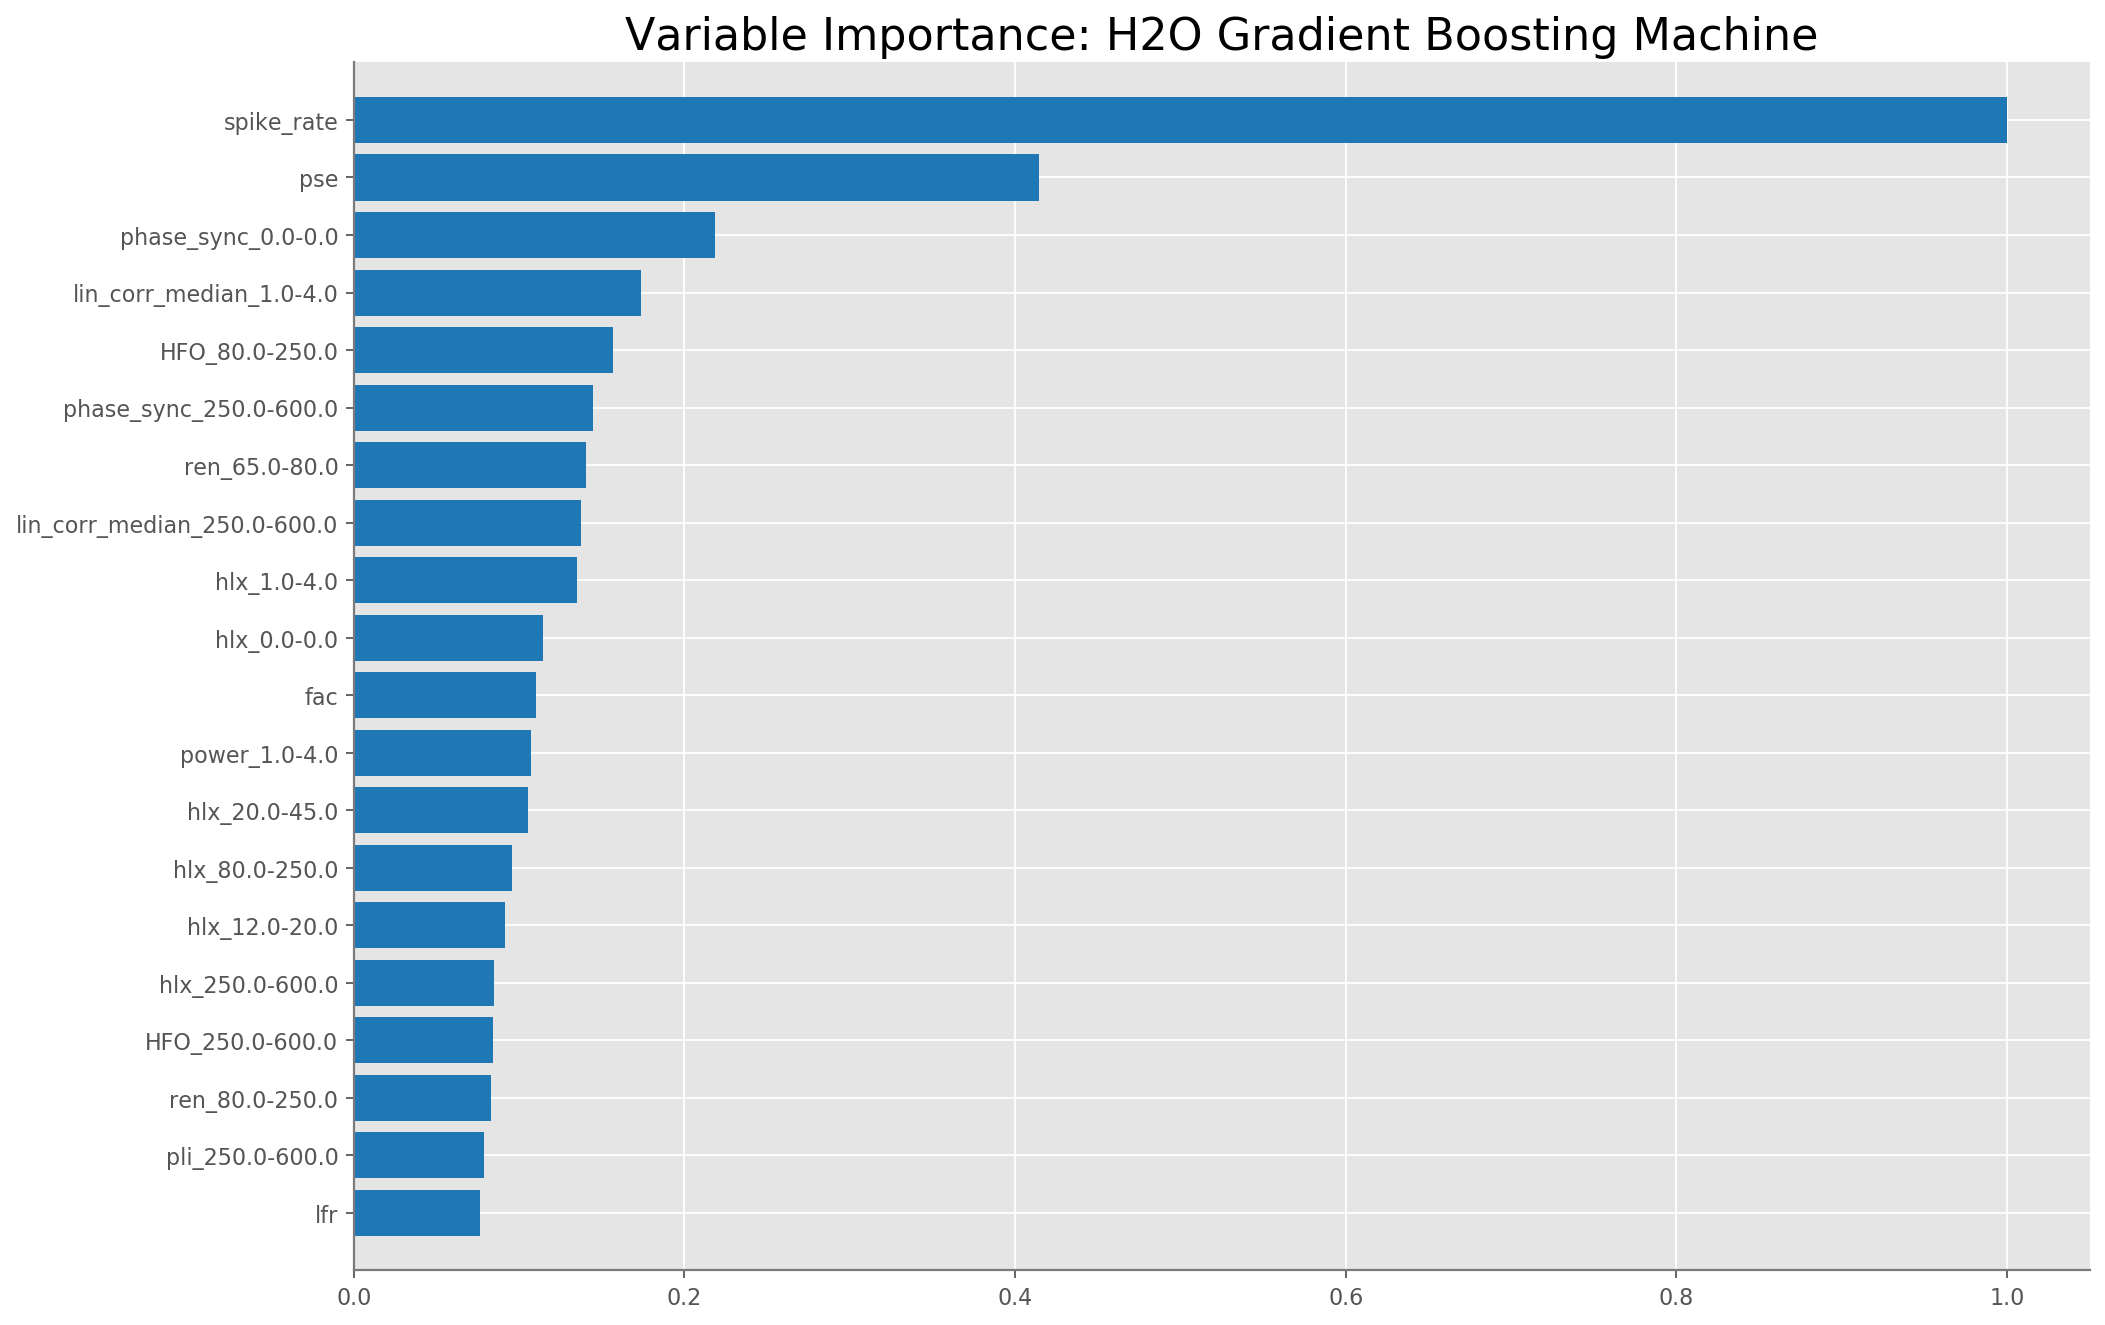

<Figure size 2240x1120 with 0 Axes>

In [59]:
# Show variable importance

model.varimp_plot(num_of_features=20)

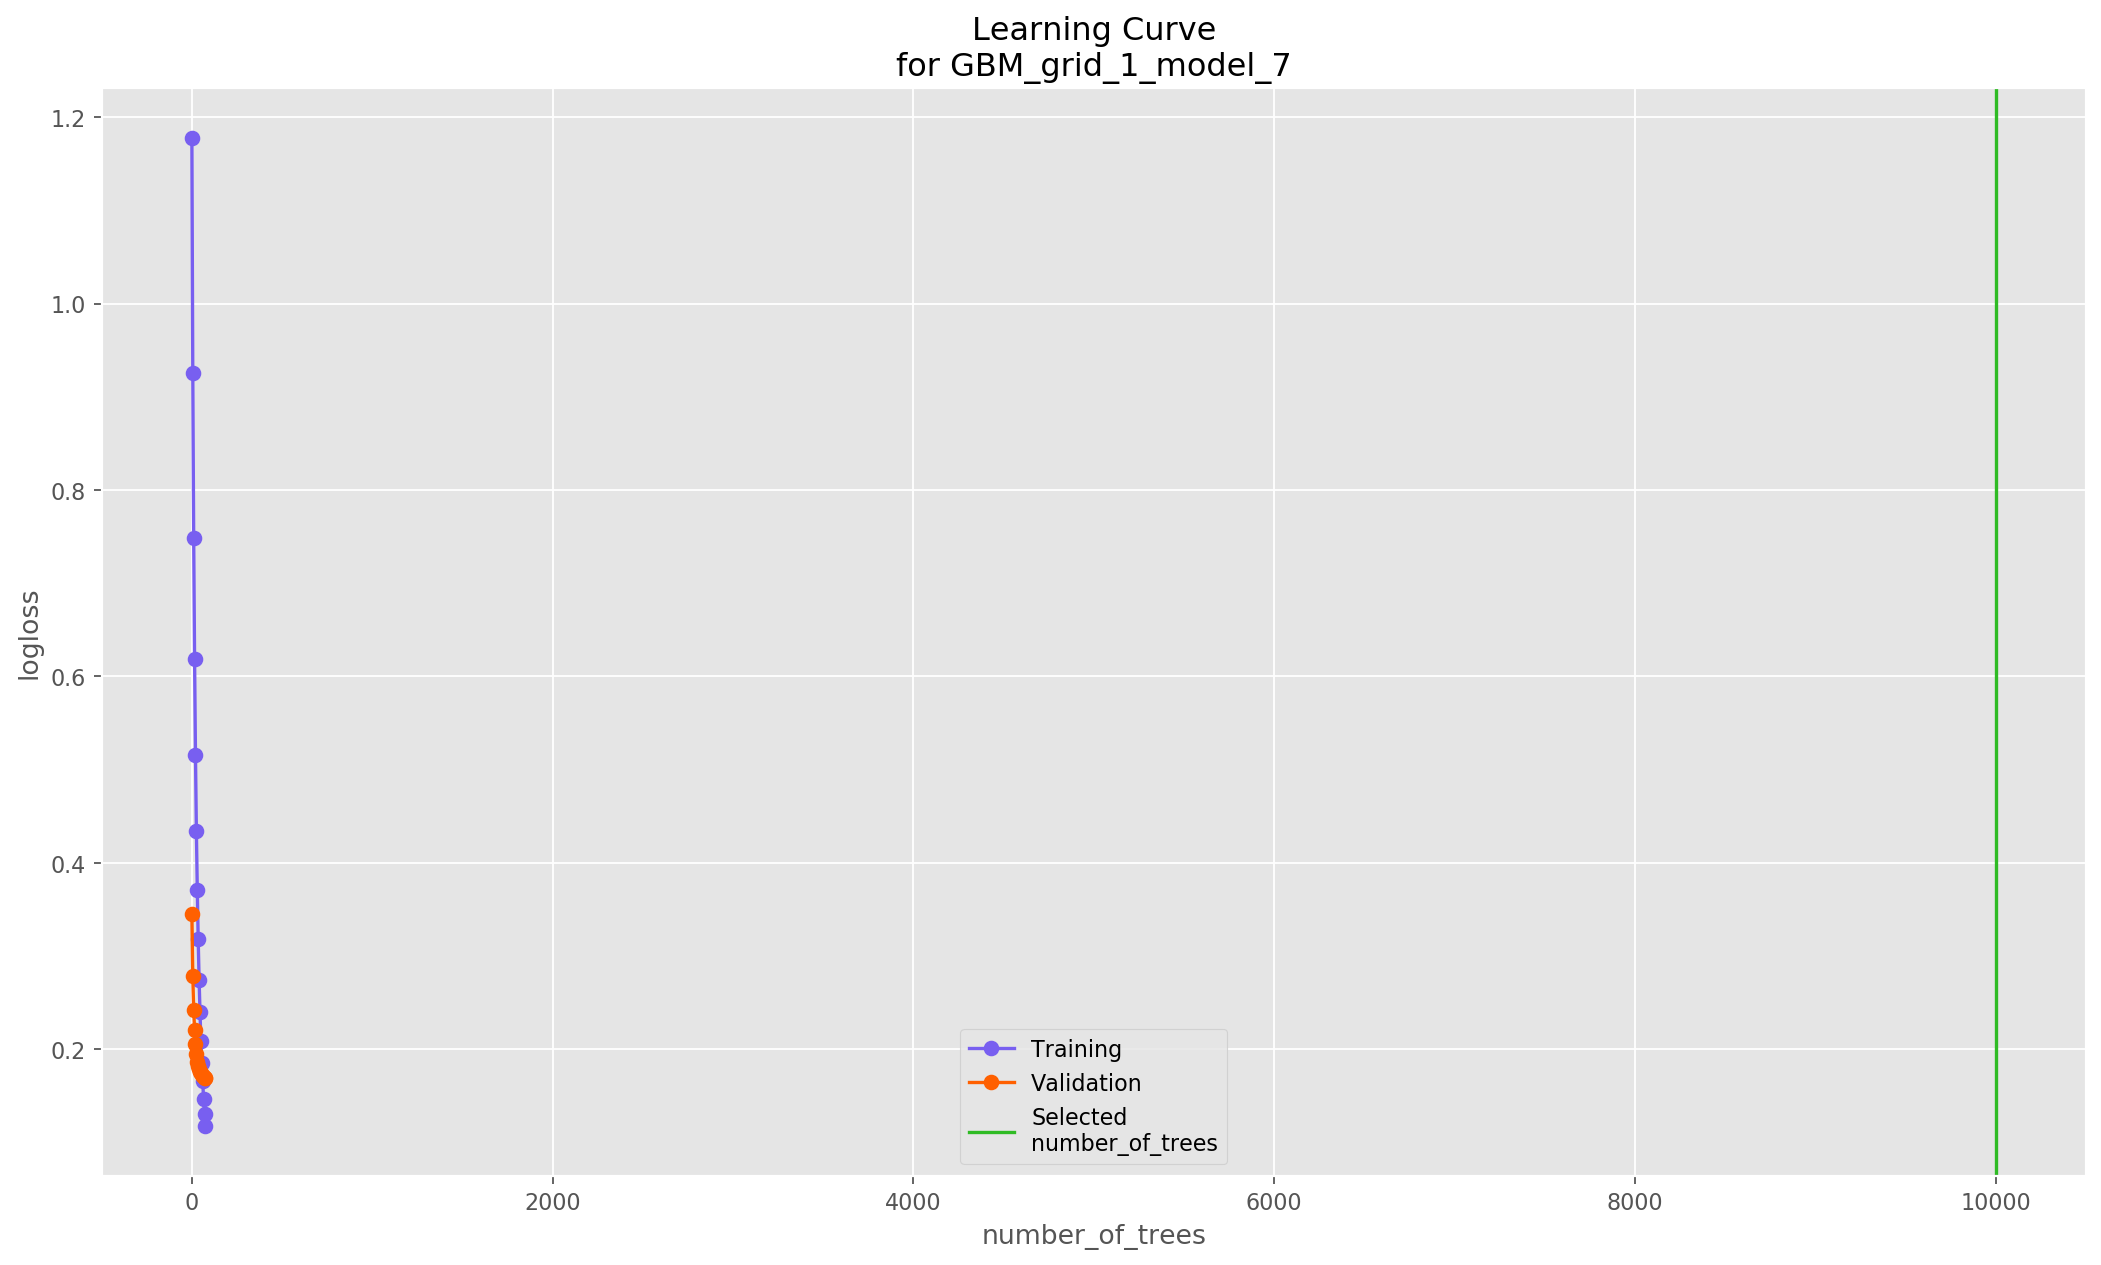

In [60]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [67]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [68]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

pathology,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,predict,normal,pathologic
normal,0,16,40,49,0.518898,0.780688,1.059,0.246359,0.417731,0.0172302,0.0471388,0.0136991,22.8359,1.12322,1.05522,1.01696,1.03695,1.06297,1.00613,1.19346,1.06995,0.458209,-0.000984755,-0.00905946,0.168028,0.895323,0.0916576,0.836928,0.666348,0.986216,-99.3333,0.946648,0.942342,0.0795242,0.937776,0.815142,0.998376,-186.042,0.979502,0.974472,0.0350385,0.954852,0.837306,0.99803,-98.88,0.989349,0.996158,0.00660758,0.990449,0.940477,0.999811,-71.76,0.998444,0.991969,0.00839352,0.978559,0.892505,0.995642,-36.325,0.996168,0.996082,0.00432014,0.988694,0.915274,0.992457,-8.10333,0.998027,0.995883,0.00233462,0.988538,0.925232,0.999162,-9.625,0.997981,0.997392,0.00183677,0.990797,0.904985,0.931978,-0.286667,0.998458,0.993981,0.00284724,0.979349,1,0.841924,-0.113333,0.996071,0,0,normal,0.991667,0.00833286
normal,0,7,49,25,0.472965,0.964676,0.716276,0.190351,0.285159,0.0119757,0.0306428,0.00867748,15.9948,1.12082,1.04599,1.01865,1.03682,1.06514,1.00607,1.19647,1.06968,0.489201,-0.00124926,-0.00812918,0.311882,0.80543,0.15446,0.738541,0.533939,0.984647,-107.542,0.925594,0.950784,0.0875988,0.949821,0.810448,0.998278,-202.5,0.98183,0.954714,0.0519073,0.931563,0.780118,0.999004,-104.74,0.983585,0.990476,0.0136245,0.980753,0.896656,0.999773,-71.48,0.996043,0.979759,0.0162106,0.953787,0.806158,0.995225,-34.7917,0.990522,0.993031,0.00514991,0.979625,0.857497,0.993686,-7.50333,0.996582,0.990899,0.0046373,0.975816,0.870893,0.995709,-9.31667,0.995484,0.994831,0.00303515,0.982651,0.849122,0.914038,-0.568333,0.996949,0.996837,0.00170874,0.987526,1,0.861303,-0.0366667,0.997865,0,0,normal,0.993326,0.00667373
normal,0,6,19,8,0.347042,1.11594,1.01504,0.31053,0.481209,0.0210714,0.0541044,0.0149408,9.20048,1.2172,1.04755,1.01692,1.03646,1.06127,1.00601,1.19697,1.06963,0.566548,0.000565154,-0.0015228,0.884501,0.606213,0.25021,0.519823,0.359725,0.969987,-84.5833,0.814854,0.877887,0.151694,0.858039,0.639372,0.99688,-188.833,0.945312,0.910682,0.0819024,0.872303,0.671488,0.99627,-92.92,0.968876,0.966288,0.0354714,0.943581,0.791414,0.999378,-69.3733,0.986529,0.91726,0.0433487,0.862112,0.651536,0.996284,-30.2333,0.964943,0.931246,0.0329878,0.873649,0.631333,0.963023,-8.09333,0.968114,0.928506,0.0205303,0.87357,0.714121,0.983354,-6.8,0.967883,0.96887,0.015679,0.924473,0.657152,0.846088,-0.553333,0.982275,0.990122,0.00480543,0.96761,1,0.80995,0.1,0.993455,0,0,normal,0.997367,0.00263282
normal,0,4,21,13,0.439451,2.11374,2.96101,0.69

In [69]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['pathology', 'predict']].head(20)
preds

,pathology,predict
0,normal,normal
1,normal,normal
2,normal,normal
3,normal,normal
4,normal,normal
5,normal,normal
6,normal,normal
7,normal,normal
8,normal,normal
9,normal,normal


In [70]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')